# 最优化算法与编程基础

最优化算法的内容包括：规划论（线性规划、非线性规划、整数规划和动态规划）、库存论、图论、排队论、可靠性理论、对策论、搜索论等。

# 数学规划方法

## 线性规划

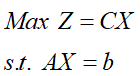

### 单纯形法

单纯形法是求解线性规划的经典方法，其原理类似多远消去法求解多元一次方程的原理类似，在具体的实现上，是通过矩阵的变换对解空间进行搜索。由于目标函数和约束都是凸函数，所以单纯形法能够以很高的效率求解线性规划问题。单纯形法是运筹优化算法的基础算法，也是后续其他整数规划等算法的基础。

单纯形法是解决线性规划问题的一个有效的算法。由于线性规划模型中目标函数和约束方程都是凸函数，因此从凸优化的角度来说，线性规划的最优解在可行域的顶点上，单纯形法的本质就是通过矩阵的线性变换来遍历这些顶点来计算最优解。

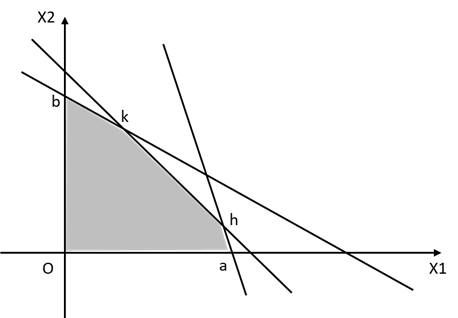

### 内点法

内点法也是求解线性规划的一个方法，相比单纯形法，内点法在大规模线性优化、二次优化、非线性规划方面都有比较好的表现，内点法是多项式算法，随着问题规模增大计算复杂度不会急剧增大，因此在大规模问题上比单纯形法有更广泛的应用。

内点法的求解思路和拉格朗日松弛法的思路类似，将约束问题转化为无约束问题，通过无约束函数的梯度下降进行迭代直至得到有效解。所谓内点法，就是梯度下降的过程中，如果当前迭代点是在可行域外，则给损失函数一个非常大的值，这样就能约束在可行域内求解。但是内点法不能处理等式约束，因为构造的内点惩罚函数是定义在可行域内的函数，而等式约束优化问题不存在可行域空间。由此看来，内点法和单纯形法对优化问题的形式是不一样的。

### 列生成法

列生成法是一种用于求解大规模线性优化问题的非常高效的算法，本质上而言，列生成算法就是单纯形法的一种形式，是用来求解线性规划问题的，所不同的是列生产法改善了大规模优化问题中，单纯形法基变换计算效率低的问题，列生产法在整数规划中已经得到广泛应用。

列生成法主要用于解决变量很多而约束相对较少的问题，特别地经常用于解决大规模整数规划问题中，整数规划问题我们后面会讲。单纯型法虽然能保证在数次迭代后找到最优解，但是其面对变量很多的线性规划问题就显得很弱了。因为它需要去在众多变量里进行基变换，这种遍历的计算量是很大的。因此，有人基于单纯型法提出了列生成算法，其思路大概就是先把原问题(master problem)强制把一部分变量限定（restrict）为非基变量得到到一个规模更小（即变量数比原问题少的）的限制主问题（restricted master problem），在限制主问题（restricted master problem）上用单纯型法求最优解，但是此时求得的最优解只是限制主问题的解，并不是原问题的最优解，就需要通过一个子问题（subproblem）去检查在那些未被考虑的变量中是否有使得限制主问题的ReducedCost小于零，如果有，那么就把这个变量的相关系数列加入到限制主问题的的系数矩阵中。

### 拉格朗日法

对于约束优化问题，可以通过内点法转化成无约束优化问题，除了内点法外，还有一种方法应用较广，就是拉格朗日乘子法。拉格朗日乘子法通过引入拉格朗日乘子将等式约束转成无约束优化问题，对于不等式约束，通过KKT对偶条件将转化成等式约束后在使用拉格朗日乘子法求解。拉格朗日求得的并不一定是最优解，只有在凸优化的情况下，才能保证得到的是最优解。

## 整数规划

在许多的实际问题中，要求决策变量的取值为正整数，比如机器的台数，需求商品的数量，工人的数量，装载货物的汽车数量等，这类要求变量为整数的问题称为整数规划（Integer Programming,IP）问题，如果只要求一部分决策变量取整数，则称为混合整数规划（Mix Integer Programming,MIP）,如果决策变量的取值只能是0或1，则称为0-1整数规划（Binary Integer Programming,BIP）,如果模型是线性模型，则称之为整数线性规划（Integer Linear Programming,ILP）。

### 分支定界法

分支定界法（Branch and Bound Algorithm, B&B），其基本思想是，对有整数约束条件的问题的可行域进行系统搜索，通常是把全部解空间反复地切割为越来越小的子集，称为分支，然后在每个子集内计算出一个目标下界，称为定界。在每次分支后，凡是下界比已知可行域目标值的那些子集差就不再进一步分支，从而减少搜索空间，称为剪枝，这边是分支定界法的主要思路。

分支定界法的思路是对原问题对应的松弛问题的可行域进行切割，切割方法是对非整数变量取相邻整数作为附加约束，从几何的角度来说，这些约束相当于切割可行域的超平面，这些超平面与坐标轴平行，分支定界法的缺点是子问题由于分支的增加呈指数增长。

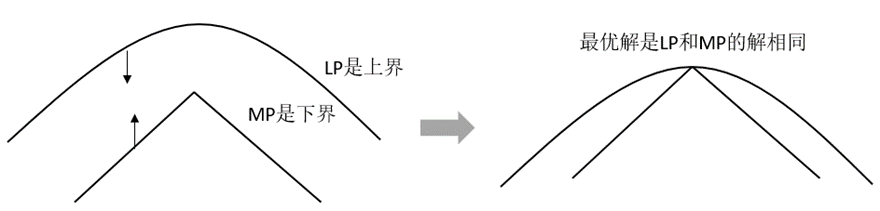

### 割平面法

割平面法通过增加切割超平面切割掉部分的解空间，该超平面应该满足两个条件：（1）刚好切割掉松弛问题的非整数解部分，（2）保留所有的整数解。

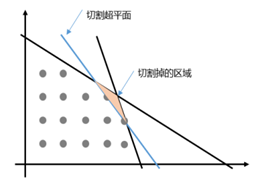

## 多目标优化

多目标优化（Multi-Objective Optimization Problem, MOP）也叫多目标规划，即同时优化多个目标的规划问题。

多目标规划一般有两种方法，一种是化多为少，即将多目标转化为比较容易求解的单目标规划方法，另一种是分层序列法，即把目标按其重要性排序，每次都在前一个目标最优解集内求解下一个目标最优解，直到求出共同的最优解。如何理解目标最优解集呢，在多目标规划中往往有多个最优解同时满足约束条件，不同的解之间不能简单通过大小来比较，这点和单目标规划是最大的不同，多个解组成的集合称为帕累托最优解集，组成的超平面称为帕累托前沿。

在多目标规划中，Pareto解是这样一个解，对其中一个目标的优化必然会导致其他目标变差，即一个解可能在其中某个目标上是最好的，但是在其他目标上是最差的，不一定在所有目标上都是最优解。在所有目标函数都是极小化的多目标规划问题中，对于任意的$k$，有$f_k(X^*)<=f_k(X)$，$X^*$支配其他解$X$，称$X^*$是多目标规划的一个Pareto最优解，又称非劣最优解。所有的Pareto最优解组成Pareto最优集合。所有Pareto最优解组成的曲面称为Pareto前沿（Pareto Front）。

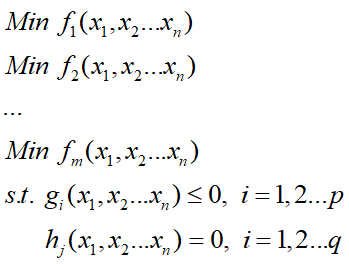

### 目标规划法

目标规划法也称功效系数法，是目前流行的求解多目标规划方法，这里将重点讲解该方法。目标规划的基本思想是，给定若干个目标以及实现这些目标的优先顺序，在资源有限的情况下，使总的偏离目标的偏差值最小。优先顺序很好理解，实现起来的方法通过给目标赋予一个权重即可。偏差变量表示未达到目标或者超过目标的部分，通常用正偏差表示目标值的部分，用负偏差表示未达到目标值的部分。

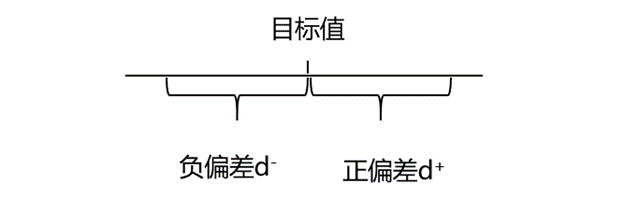

### 目标规划单纯形法

目标规划的数学模型结构和线性规划的数学模型结构没有本质的区别，因此目标规划也可以用单纯形法求解。但是由于目标规划中含有多个目标函数，因此单纯形表中的检验数会有多行，检验数的行数由目标优先等级的个数决定，在确认入基变量时，不但要根据本优先级的检验数，还要根据比它更高优先级的检验数来确定。

### NSGA-Ⅱ

多目标规划算法除了前面提到的目标规划法外，使用智能优化算法求解多目标规划问题也是常见的方法，其中以NSGA-Ⅱ最为流行。

NSGA-Ⅱ算法是Srinivas和Deb于2000年在 NSGA 的基础上提出的，它比 NSGA算法更加优越，它采用了快速非支配排序算法，计算复杂度比NSGA大大的降低；采用了拥挤度和拥挤度比较算子，代替了需要指定的共享半径 shareQ，并在快速排序后的同级比较中作为胜出标准，使准 Pareto 域中的个体能扩展到整个 Pareto 域，并均匀分布，保持了种群的多样性；引入了精英策略，扩大了采样空间，防止最佳个体的丢失，提高了算法的运算速度和鲁棒性。

# 启发式算法

## 动态规划

动态规划（dynamic programming，DP）是运筹学的一个分支，是解决多阶段决策过程最优化的一种方法，它把多变量复杂决策的问题进行分阶段决策，高效求解多个单变量的决策问题，许多问题用动态规划处理，比用线性规划或非线性规划处理更加有效，比如最短路径问题，设备维修换新问题，多阶段库存问题等，动态规划在现代企业管理，工农业生产中有着广泛的应用。

什么是多阶段决策问题呢？有这样一类问题，它可以从时间或者空间上将决策的过程分解为若干个相互联系的阶段，每个阶段都需要做出决策，当前阶段的决策往往会影响到下一个阶段的决策。我们把各阶段的决策构成一个决策序列，称为策略。因为每个阶段都有若干个决策可供选择，因为就有许多策略供我们选择。如何在这些策略中选择一个最优策略，这类问题就是多阶段决策问题。

动态规划的最优性原理是：作为整体过程的最优策略，无论过去的状态和决策如何，对前面的形成状态而言，剩下的决策必然构成最优策略，简而言之，一个最优策略的子策略总是最优的。

最优性原理是动态规划的核心，各种动态规划模型都是根据这一原理进行，根据这一原理，在求解动态规划问题时，可以按照从后往前倒推最优解的思路进行。

### 最短路径问题

最短路径是一类典型的动态规划问题。

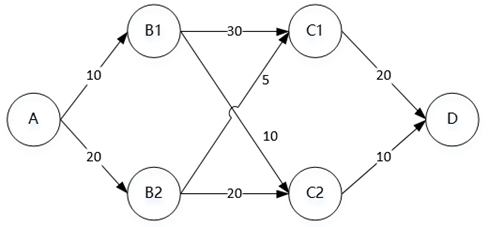

### 背包问题

背包问题是学习动态规划的经典例题，虽然是多阶段决策问题，但不同于最短路径问题那样直观，最短路径问题的不同阶段、状态、决策、收益是固定而明显的，而背包问题的状态、决策需要通过动态规划表来表达。

背包问题根据物品的数量分为不同类型背包问题，如果每种物品只有一件，成为0-1背包问题，可以看成是0-1整数规划问题；如果每种物品有多件，则背包问题可以看成是普通的整数规划问题；对于每件物品，具有两种不同的费用，选择这件物品必须同时付出这两种代价，对于每种代价都有一个可付出的最大值，这种情况是二维费用的背包问题；如果物品之间有冲突，选择A物品则不能选B物品，这种情况是分组背包问题，如果物品之间有依赖，选择A物品则必须同时选B物品，这种情况是有依赖的背包问题。

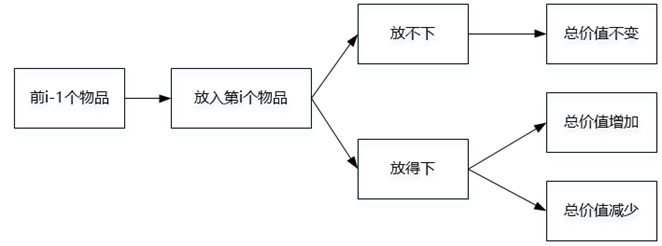

## 图与网络分析

### 图的基本概念

在运筹优化领域，图与网络分析是一个很重要的组成部分，特别是在交通运输领域，问题会被建模成一个图优化问题。不仅仅是交通问题可以用图的模型表示，像人物关系图谱、任务流程依赖关系、电力线网、信息网络等都可以用图来表示。

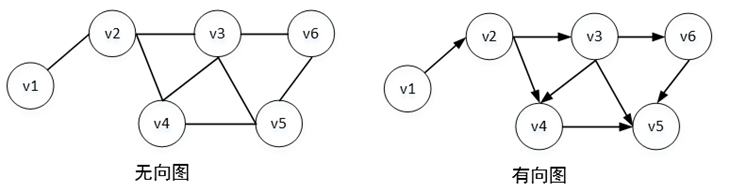

### 图的矩阵表示

图的存储和表示，一个常见的方式是邻接矩阵，邻接矩阵是一个二维矩阵，矩阵的行和列表示顶点编号，值表示顶点之间的边信息。设图G有n个顶点，则邻接矩阵是NxN一个的方阵，定义为：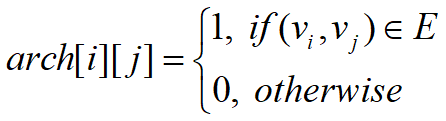

### 最小生成树

在图网络中，一个无圈且连通的无向图称为树。注意，树首先是无圈的，其次是连通的。如图，左图是一连通图，右图是左图的一棵树。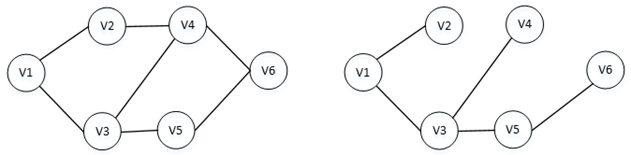

权值总和是衡量切割优劣的一个指标，在大部分问题中，我们希望图经过切割后生成的树，边的权值总和最小，这样的树称为图的最小生成树。 

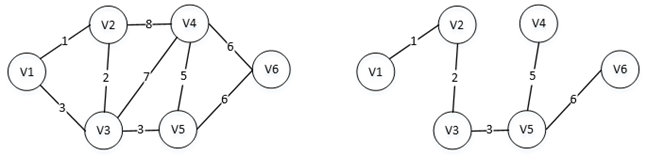

### 最短路径问题

用图网络理论来分析最短路径问题的原理：若$\{v_1, v_2, ...,v_n\}$是$v_1$到$v_n$的最短路径，则$\{v_1, v_2, ...,v_i\}$也必然是$v_1$到$v_i$的最短路径。动态规划中，最短路径是反向搜索问题，而图分析属于正向搜索问题。最常用的方法是迪克斯科拉(Dijkstra)算法。

### 网络最大流问题

研究网络通过的流量也是生产管理中经常遇到的问题，比如交通干线车辆最大通行能力，生产流水线产品最大加工能力，供水网络中最大水流量等。这类网络的弧有确定的容量（capacity）,常用$c_{ij}$表示i从节点到节点j的弧最大流量，实际上通过该弧的流量不一定能达到最大流量，常用$f_{ij}$表示通过弧的实际流量。

### 路径规划

路径规划描述的问题和最短路径问题类似，前面讲的最短路径问题是一维网络最短路径问题，网络使用节点和边来表达，而路径规划问题是二维坐标系中的最短路径问题，节点使用二维坐标表示，比如地图、棋盘的场景的路径规划，在地图或者棋盘中，每个坐标点表示一个节点，这样任意两个节点之间的路径搜索比之前讲最短路径问题要多很多，在前面dijkstra讲算法时我们知道，dijkstra使用深度优先搜索或者广度优先搜寻对整个网络进行搜索，显然这种方法在二维坐标的中是耗费会跟多，这就需要使用新的方法来解决路径规划问题。

### VRP问题

VRP是车辆路径问题，是TSP问题的扩展，是交通物流领域的研究热点。

# 智能优化算法

适应度函数是优化问题的目标函数，需根据不同应用设计相应的适应度函数。

In [31]:
import os
import sys
path = 'D:/Jupyter notebook/src/01.python/03.算法原理/06.运筹优化/docs' #项目所在文件夹
sys.path.insert(0, path)

## 粒子群算法

粒子群算法（Particle Swarm Optimization，PSO），模拟鸟群捕食过程的算法，它的基本核心是利用群体中的个体对信息的共享从而使得整个群体的运动在问题求解空间中产生从无序到有序的演化过程，从而获得问题的最优解。我们可以利用一个有关PSO的经典描述来对PSO算法进行一个直观的描述。设想这么一个场景：一群鸟进行觅食，而远处有一片玉米地，所有的鸟都不知道玉米地到底在哪里，但是它们知道自己当前的位置距离玉米地有多远。那么找到玉米地的最佳策略，也是最简单有效的策略就是搜寻目前距离玉米地最近的鸟群的周围区域。PSO就是从这种群体觅食的行为中得到了启示，从而构建的一种优化模型。 

在PSO中，每个优化问题的解都是搜索空间中的一只鸟，称之为“粒子”，而问题的最优解就对应为鸟群要寻找的“玉米地”。所有的粒子都具有一个位置向量（粒子在解空间的位置）和速度向量（决定下次飞行的方向和速度），并可以根据目标函数来计算当前的所在位置的适应值（fitness value），可以将其理解为距离“玉米地”的距离。在每次的迭代中，种群中的粒子除了根据自身的“经验”（历史位置）进行学习以外，还可以根据种群中最优粒子的“经验”来学习，从而确定下一次迭代时需要如何调整和改变飞行的方向和速度。就这样逐步迭代，最终整个种群的粒子就会逐步趋于最优解。

粒子群算法的信息共享机制可以解释为一种共生合作的行为，即每个粒子都在不停的搜索，并且其搜索行为在不同的程度上受到群体中其他个体的影响，同时这些粒子还具备对所经历最佳位置的记忆能力，即其搜索行为在受其他个体影响的同时，还受到自身经验的引导。基于独特的搜索机制，粒子群算法首先生成初始种群，即在可行解空间和速度空间随机制初始化粒子的速度与位置，其中粒子的位置用于表征问题的可行解，然后通过种群间粒子个体的合作与竞争来求解优化问题。

整体流程如图所示。

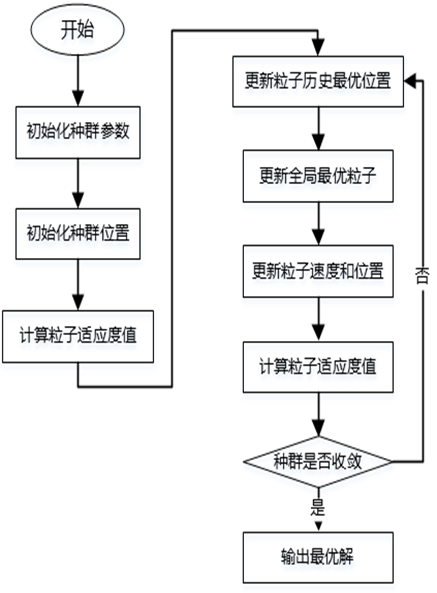

### 应用案例

best_x is  [0.   0.05 0.5 ] best_y is [0.25]


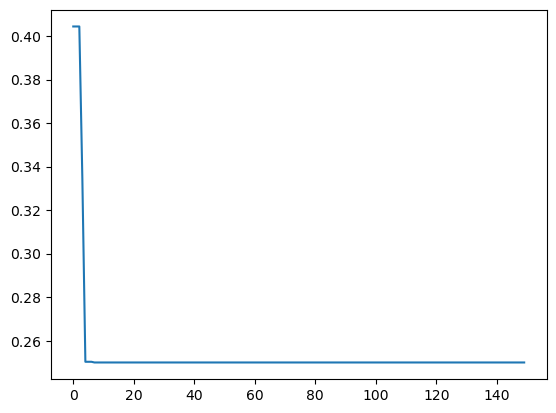

In [43]:
def demo_func(x):
    x1, x2, x3 = x
    return x1 ** 2 + (x2 - 0.05) ** 2 + x3 ** 2


# %% Do PSO
from sko.PSO import PSO

pso = PSO(func=demo_func, n_dim=3, pop=40, max_iter=150, lb=[0, -1, 0.5], ub=[1, 1, 1], w=0.8, c1=0.5, c2=0.5)
pso.run()
print('best_x is ', pso.gbest_x, 'best_y is', pso.gbest_y)

# %% Plot the result
import matplotlib.pyplot as plt

plt.plot(pso.gbest_y_hist)
plt.show()

## 遗传算法

遗传算法是一种基于自然选择机制的搜索算法。其本质是定义了一种框架，在这种框架下人为干预和随机信息交换相结合，进而产生出有可能的最优结果。由于是基于自然界的选择机制，在遗传算法的这种框架下，每一次新的个体的产生是基于上一代个体的信息以及有可能的突变或者交换信息进而得到的结果。尽管是随机产生的突变结果，然而遗传算法得到的结果并不仅仅是随机查找的结果。遗传算法能够有效地探索新个体上一代的信息，进而演化得到更加优化的下一代，并且在这种基础之上，提高了计算性能。

遗传算法（Genetic Algorithm, GA）起源于对生物系统所进行的计算机模拟研究，它是模仿自然界生物进化机制发展起来的随机全局搜索和优化方法，借鉴了达尔文的进化论和孟德尔的遗传学说，其本质是一种高效、并行、全局搜索的方法，能在搜索过程中自动获取和积累有关搜索空间的知识，并自适应地控制搜索过程以求得最佳解。

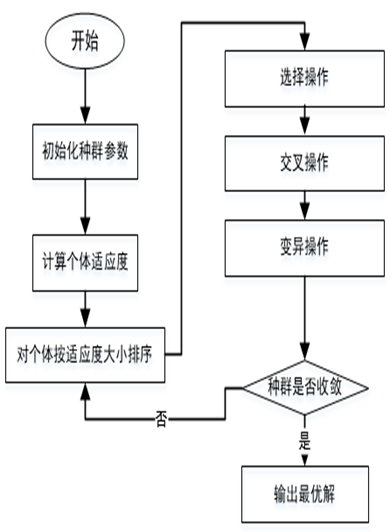

遗传算法常用的编码方式有二进制编码，格雷编码，实数编码，符号编码，矩阵编码，树形编码等。在前面讲遗传算法基本概念时使用二进制编码为例讲解，二进制编码的方案与染色体基因的表现形式最接近，而且这种方案也是最容易理解遗传算法的种群进化过程，一般讲遗传算法的时候都会以二进制编码为例，这里也不例外。

遗传算法的选择操作是选择种群中适应度较高的个体形成子代种群，常用的选择操作有轮盘赌法和精英策略。

### 应用案例

best_x: [2.98023233e-08 3.27825556e-07] 
 best_y: [0.]


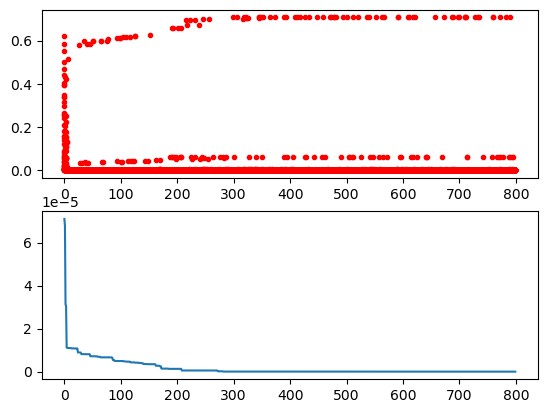

In [7]:
import numpy as np


def schaffer(p):
    '''
    This function has plenty of local minimum, with strong shocks
    global minimum at (0,0) with value 0
    https://en.wikipedia.org/wiki/Test_functions_for_optimization
    '''
    x1, x2 = p
    part1 = np.square(x1) - np.square(x2)
    part2 = np.square(x1) + np.square(x2)
    return 0.5 + (np.square(np.sin(part1)) - 0.5) / np.square(1 + 0.001 * part2)


# %%
from sko.GA import GA

ga = GA(func=schaffer, n_dim=2, size_pop=50, max_iter=800, prob_mut=0.001, lb=[-1, -1], ub=[1, 1], precision=1e-7)
best_x, best_y = ga.run()
print('best_x:', best_x, '\n', 'best_y:', best_y)
# %% Plot the result
import pandas as pd
import matplotlib.pyplot as plt

Y_history = pd.DataFrame(ga.all_history_Y)
# print(Y_history)
fig, ax = plt.subplots(2, 1)
ax[0].plot(Y_history.index, Y_history.values, '.', color='red')
Y_history.min(axis=1).cummin().plot(kind='line')
plt.show()

## 差分进化算法

差分进化算法（Differential Evolution，DE)于1997年由Rainer Storn和Kenneth Price在遗传算法等进化思想的基础上提出的，本质是一种多目标（连续变量）优化算法（MOEAs），用于求解多维空间中整体最优解。

差分进化思想来源即是早期提出的遗传算法（GeneticAlgorithm，GA），模拟遗传学中的杂交(crossover)、变异(mutation)、复制(reproduction)来设计遗传算子。

差分进化算法相对于遗传算法而言，相同点都是通过随机生成初始种群，以种群中每个个体的适应度值为选择标准，主要过程也都包括变异、交叉和选择三个步骤。不同之处在于遗传算法是根据适应度值来控制父代杂交，变异后产生的子代被选择的概率值，在最大化问题中适应值大的个体被选择的概率相应也会大一些。而差分进化算法变异向量是由父代差分向量生成，并与父代个体向量交叉生成新个体向量，直接与其父代个体进行选择。显然差分进化算法相对遗传算法的逼近效果更加显著。

### 应用案例

In [36]:
'''
min f(x1, x2, x3) = x1^2 + x2^2 + x3^2
s.t.
    x1*x2 >= 1
    x1*x2 <= 5
    x2 + x3 = 1
    0 <= x1, x2, x3 <= 5
'''


def obj_func(p):
    x1, x2, x3 = p
    return x1 ** 2 + x2 ** 2 + x3 ** 2


constraint_eq = [
    lambda x: 1 - x[1] - x[2]
]

constraint_ueq = [
    lambda x: 1 - x[0] * x[1],
    lambda x: x[0] * x[1] - 5
]

# %% Do DifferentialEvolution
from sko.DE import DE

de = DE(func=obj_func, n_dim=3, size_pop=50, max_iter=800, lb=[0, 0, 0], ub=[5, 5, 5],
        constraint_eq=constraint_eq, constraint_ueq=constraint_ueq)

best_x, best_y = de.run()
print('best_x:', best_x, '\n', 'best_y:', best_y)

best_x: [1.00940828 0.99072997 0.00927003] 
 best_y: [2.00053689]


## 模拟退火算法

模拟退火算法(SA)来源于固体退火原理，是一种基于概率的算法。将固体加温至充分高的温度，再让其徐徐冷却，加温时，固体内部粒子随温升变为无序状，内能增大，分子和原子越不稳定。而徐徐冷却时粒子渐趋有序，能量减少，原子越稳定。在冷却（降温）过程中，固体在每个温度都达到平衡态，最后在常温时达到基态，内能减为最小。
模拟退火算法从某一较高初温出发，伴随温度参数的不断下降,结合概率突跳特性在解空间中随机寻找目标函数的全局最优解，即在局部最优解能概率性地跳出并最终趋于全局最优。模拟退火算法是通过赋予搜索过程一种时变且最终趋于零的概率突跳性，从而可有效避免陷入局部极小并最终趋于全局最优的串行结构的优化算法。

### 应用案例

best_x: [7.51249094e-06 5.00126391e-02 9.35979542e-07] best_y 2.1706007013458345e-10


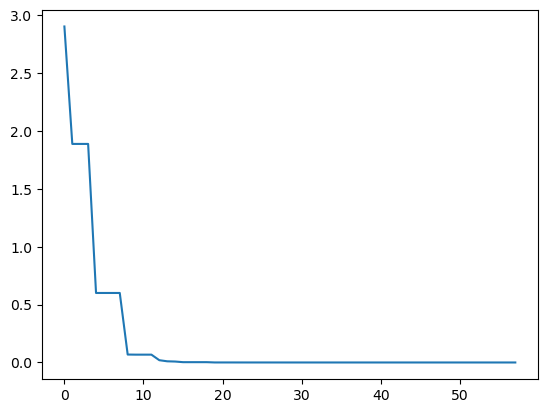

Fast Simulated Annealing: best_x is  [-1.97976478e-06  4.99870513e-02  1.26774657e-05] best_y is  3.3230606520351875e-10
Fast Simulated Annealing with bounds: best_x is  [-7.64796262e-07  1.00000000e+00 -5.56452600e-07] best_y is  0.9025000000008945
Boltzmann Simulated Annealing: best_x is  [-0.0022822   0.05105981  0.00053688] best_y is  0.9025000000008945
Boltzmann Simulated Annealing with bounds: best_x is  [-0.0038035   0.05163451  0.00514789] best_y is  0.9025000000008945
Cauchy Simulated Annealing: best_x is  [-0.0010839   0.04904576  0.00150533] best_y is  4.351446048919591e-06
Cauchy Simulated Annealing with bounds: best_x is  [ 2.00044385e-04  1.00000000e+00 -2.39115321e-04] best_y is  0.9025000971938927


In [37]:
demo_func = lambda x: x[0] ** 2 + (x[1] - 0.05) ** 2 + x[2] ** 2

# %% Do SA
from sko.SA import SA

sa = SA(func=demo_func, x0=[1, 1, 1], T_max=1, T_min=1e-9, L=300, max_stay_counter=150)
best_x, best_y = sa.run()
print('best_x:', best_x, 'best_y', best_y)

# %% Plot the result
import matplotlib.pyplot as plt
import pandas as pd

plt.plot(pd.DataFrame(sa.best_y_history).cummin(axis=0))
plt.show()

# %%
from sko.SA import SAFast

sa_fast = SAFast(func=demo_func, x0=[1, 1, 1], T_max=1, T_min=1e-9, q=0.99, L=300, max_stay_counter=150)
sa_fast.run()
print('Fast Simulated Annealing: best_x is ', sa_fast.best_x, 'best_y is ', sa_fast.best_y)

# %%
from sko.SA import SAFast

sa_fast = SAFast(func=demo_func, x0=[1, 1, 1], T_max=1, T_min=1e-9, q=0.99, L=300, max_stay_counter=150,
                 lb=[-1, 1, -1], ub=[2, 3, 4])
sa_fast.run()
print('Fast Simulated Annealing with bounds: best_x is ', sa_fast.best_x, 'best_y is ', sa_fast.best_y)

# %%
from sko.SA import SABoltzmann

sa_boltzmann = SABoltzmann(func=demo_func, x0=[1, 1, 1], T_max=1, T_min=1e-9, q=0.99, L=300, max_stay_counter=150)
sa_boltzmann.run()
print('Boltzmann Simulated Annealing: best_x is ', sa_boltzmann.best_x, 'best_y is ', sa_fast.best_y)


# %%
from sko.SA import SABoltzmann

sa_boltzmann = SABoltzmann(func=demo_func, x0=[1, 1, 1], T_max=1, T_min=1e-9, q=0.99, L=300, max_stay_counter=150,
                           lb=-1, ub=[2, 3, 4])
sa_boltzmann.run()
print('Boltzmann Simulated Annealing with bounds: best_x is ', sa_boltzmann.best_x, 'best_y is ', sa_fast.best_y)

# %%
from sko.SA import SACauchy

sa_cauchy = SACauchy(func=demo_func, x0=[1, 1, 1], T_max=1, T_min=1e-9, q=0.99, L=300, max_stay_counter=150)
sa_cauchy.run()
print('Cauchy Simulated Annealing: best_x is ', sa_cauchy.best_x, 'best_y is ', sa_cauchy.best_y)

# %%
from sko.SA import SACauchy

sa_cauchy = SACauchy(func=demo_func, x0=[1, 1, 1], T_max=1, T_min=1e-9, q=0.99, L=300, max_stay_counter=150,
                     lb=[-1, 1, -1], ub=[2, 3, 4])
sa_cauchy.run()
print('Cauchy Simulated Annealing with bounds: best_x is ', sa_cauchy.best_x, 'best_y is ', sa_cauchy.best_y)

## 蚁群算法

自然界蚂蚁群体在寻找食物的过程中，通过一种被称为信息素（Pheromone）的物质实现相互的间接通信，从而能够合作发现从蚁穴到食物源的最短路径。
通过对这种群体智能行为的抽象建模，研究者提出了蚁群优化算法（Ant Colony Optimization, ACO），为最优化问题、尤其是组合优化问题的求解提供了一强有力的手段。

蚂蚁在寻找食物的过程中往往是随机选择路径的，但它们能感知当前地面上的信息素浓度，并倾向于往信息素浓度高的方向行进。信息素由蚂蚁自身释放，是实现蚁群内间接通信的物质。由于较短路径上蚂蚁的往返时间比较短，单位时间内经过该路径的蚂蚁多，所以信息素的积累速度比较长路径快。因此，当后续蚂蚁在路口时，就能感知先前蚂蚁留下的信息，并倾向于选择一条较短的路径前行。这种正反馈机制使得越来越多的蚂蚁在巢穴与食物之间的最短路径上行进。由于其他路径上的信息素会随着时间蒸发，最终所有的蚂蚁都在最优路径上行进。

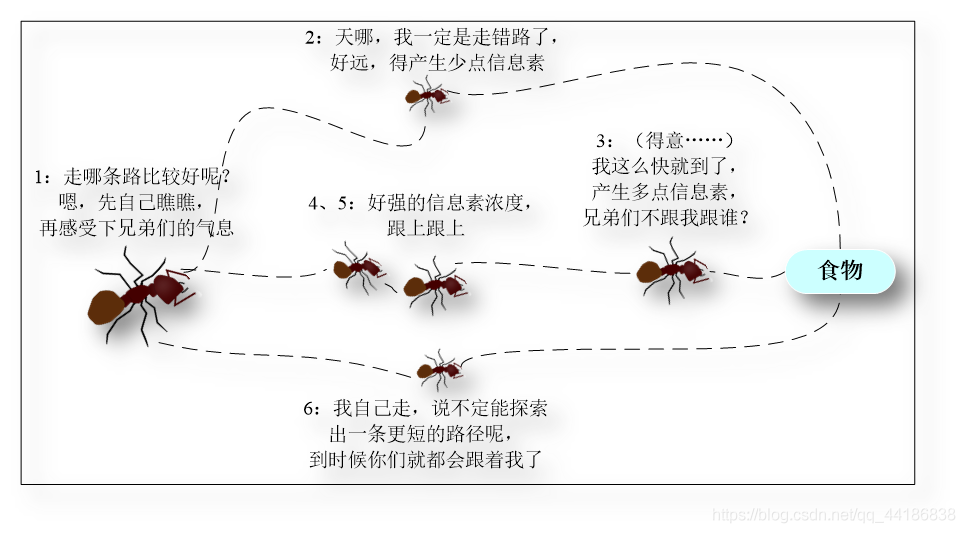

### 应用案例

[ 0  7  1 22 14 24 23  6 12  8 13 16  3 11 10  4 21 17 18 19  2  5 20  9
 15]
[ 0  7  1 22 14 24 23  6 12  8 13 16  3 11 10  4 21 17 18 19  2  5 20  9
 15  0]


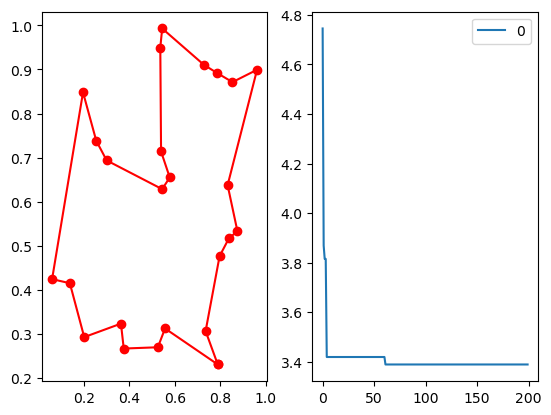

In [46]:
import numpy as np
from scipy import spatial
import pandas as pd
import matplotlib.pyplot as plt

num_points = 25

points_coordinate = np.random.rand(num_points, 2)  # generate coordinate of points
distance_matrix = spatial.distance.cdist(points_coordinate, points_coordinate, metric='euclidean')


def cal_total_distance(routine):
    num_points, = routine.shape
    return sum([distance_matrix[routine[i % num_points], routine[(i + 1) % num_points]] for i in range(num_points)])


# %% Do ACA
from ACA import ACA_TSP

aca = ACA_TSP(func=cal_total_distance, n_dim=num_points,
              size_pop=50, max_iter=200,
              distance_matrix=distance_matrix)

best_x, best_y = aca.run()

# %% Plot
fig, ax = plt.subplots(1, 2)
best_points_ = np.concatenate([best_x, [best_x[0]]])
print(best_x)  # 结果序列
print(best_points_)  # 添加起点形成环
best_points_coordinate = points_coordinate[best_points_, :]  # 找到点序列对应的坐标序列
ax[0].plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1], 'o-r')  # 连接
pd.DataFrame(aca.y_best_history).cummin().plot(ax=ax[1])
plt.show()

## 黏菌算法

黏菌算法（SMA）由李世民等人发表于2020年，模拟了黏菌觅食过程中的行为和形态变化。

黏菌在有丝分裂后形成的变形体成熟之后，进入营养生长时期，会形成网状型态，且依照食物、水与氧气等所需养分改变其表面积。在黏菌算法中，黏菌会根据当前位置的客观条件（适应度函数优劣），决定每个个体所在位置的权重，然后个体会根据权重决定新的位置在哪。

当黏菌接近食物源时，生物振荡器会通过静脉产生传播波，来增加细胞质流量。食物浓度越高，生物振荡器产生的传播波越强，细胞质流动越快。黏菌算法就是通过模拟黏菌这种捕食行为来实现智能寻优功能的。

借鉴黏菌的生物行为，可以抽象出三个规则：

- 接近食物： 黏菌通过空气中的气味接近食物，黏菌接近食物时呈圆形与扇形结构运动。
- 包围食物： 黏菌静脉接触的食物浓度越高，生物振荡器产生的传播波越强，细胞质流动越快。
- 抓取食物： 黏菌在食物浓度低时更慢地接近食物，找到优质食物时更快地接近食物。

![hello](../../images/黏菌算法.png)

### 应用案例

#### 案例一

![hello](../../images/p2.jpg)

最优适应度值： [2.08292608e-163]
最优解[x1,x2]： [-4.79280331e-83  4.53867284e-82]


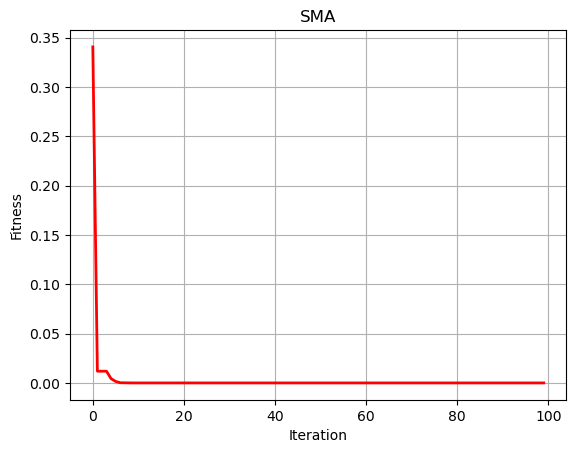

In [35]:
import numpy as np
from matplotlib import pyplot as plt
import SMA

'''适应度函数'''
def fun(X):
    fitness=X[0]**2 + X[1]**2
    return fitness

'''黏菌优化算法求解x1^2 + x2^2的最小值'''

'''主函数 '''
#设置参数
pop = 50 #种群数量
MaxIter = 100 #最大迭代次数
dim = 2 #维度
lb = -10*np.ones(dim) #下边界
ub = 10*np.ones(dim)#上边界
#适应度函数选择
fobj = fun
GbestScore,GbestPositon,Curve = SMA.SMA(pop,dim,lb,ub,MaxIter,fobj) 
print('最优适应度值：',GbestScore)
print('最优解[x1,x2]：',GbestPositon)

#绘制适应度曲线
plt.figure(1)
plt.plot(Curve,'r-',linewidth=2)
plt.xlabel('Iteration',fontsize='medium')
plt.ylabel("Fitness",fontsize='medium')
plt.grid()
plt.title('SMA',fontsize='large')
plt.show()

#### 案例二

![hello](../../images/p1.jpg)

最优适应度值： [8051.81516297]
最优解[Ts,Th,R,L]： [ 1.30066371  0.64291378 67.38620995 10.        ]


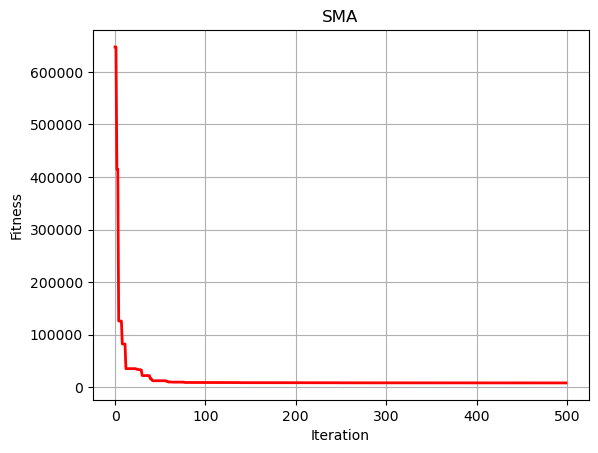

In [32]:
'''黏菌优化算法求解压力容器设计'''
import numpy as np
from matplotlib import pyplot as plt
import SMA

'''适应度函数'''
def fun(X):
        x1 = X[0] #Ts
        x2 = X[1] #Th
        x3 = X[2] #R
        x4 = X[3] #L
        
        #约束条件判断
        g1 = -x1+0.0193*x3
        g2 = -x2+0.00954*x3
        g3 = -np.math.pi*x3**2-4*np.math.pi*x3**3/3+1296000
        g4 = x4-240
        if g1<=0 and g2<=0 and g3<=0 and g4<=0:
            #如果满足约束条件则计算适应度值
            fitness = 0.6224*x1*x3*x4 + 1.7781*x2*x3**2 + 3.1661*x1**2*x4 + 19.84*x1**2*x3
        else:
            #如果不满足约束条件，则设置适应度值为很大的一个惩罚数
            fitness = 10E32
        
        return fitness

'''主函数 '''
#设置参数
pop = 50 #种群数量
MaxIter = 500 #最大迭代次数
dim = 4 #维度
lb = np.array([0,0,10,10]) #下边界
ub = np.array([100,100,100,100])#上边界
#适应度函数选择
fobj = fun
GbestScore,GbestPositon,Curve = SMA.SMA(pop,dim,lb,ub,MaxIter,fobj) 
print('最优适应度值：',GbestScore)
print('最优解[Ts,Th,R,L]：',GbestPositon)

#绘制适应度曲线
plt.figure(1)
plt.plot(Curve,'r-',linewidth=2)
plt.xlabel('Iteration',fontsize='medium')
plt.ylabel("Fitness",fontsize='medium')
plt.grid()
plt.title('SMA',fontsize='large')
plt.show()

#### 案例三

![hello](../../images/p4.jpg)

最优适应度值： [263.96533583]
最优解[x1,x2]： [0.77931171 0.43542698]


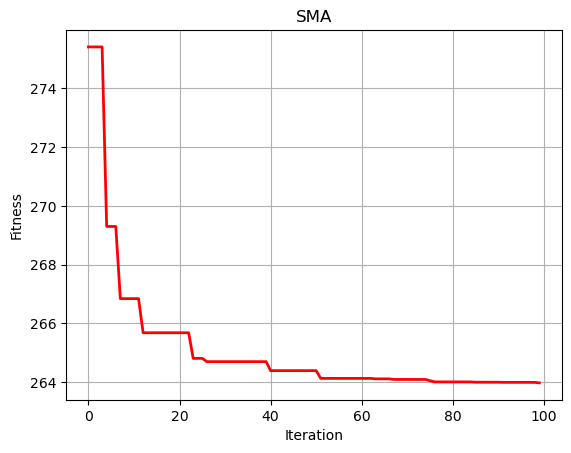

In [33]:
'''基于黏菌优化算法的三杆桁架设计'''
import numpy as np
from matplotlib import pyplot as plt
import SMA

'''适应度函数'''
def fun(X):
        x1 = X[0]
        x2 = X[1]
        l = 100
        P = 2
        sigma = 2
        #约束条件判断
        g1 = (np.sqrt(2)*x1+x2)*P/(np.sqrt(2)*x1**2+2*x1*x2)-sigma
        g2 = x2*P/(np.sqrt(2)*x1**2+2*x1*x2) - sigma
        g3 = P/(np.sqrt(2)*x2+x1)-sigma
        if g1<=0 and g2<=0 and g3<=0:
            #如果满足约束条件则计算适应度值
            fitness = (2*np.sqrt(2)*x1+x2)*l
        else:
            #如果不满足约束条件，则设置适应度值为很大的一个惩罚数
            fitness = 10E32
        
        return fitness

'''主函数 '''
#设置参数
pop = 30 #种群数量
MaxIter = 100 #最大迭代次数
dim = 2 #维度
lb = np.array([0.001,0.001]) #下边界
ub = np.array([1,1])#上边界
#适应度函数选择
fobj = fun
GbestScore,GbestPositon,Curve = SMA.SMA(pop,dim,lb,ub,MaxIter,fobj) 
print('最优适应度值：',GbestScore)
print('最优解[x1,x2]：',GbestPositon)

#绘制适应度曲线
plt.figure(1)
plt.plot(Curve,'r-',linewidth=2)
plt.xlabel('Iteration',fontsize='medium')
plt.ylabel("Fitness",fontsize='medium')
plt.grid()
plt.title('SMA',fontsize='large')
plt.show()

#### 案例四

![hello](../../images/p3.jpg)

最优适应度值： [0.01515969]
最优解[x1,x2,x3]： [0.06387097 0.72672438 3.11344459]


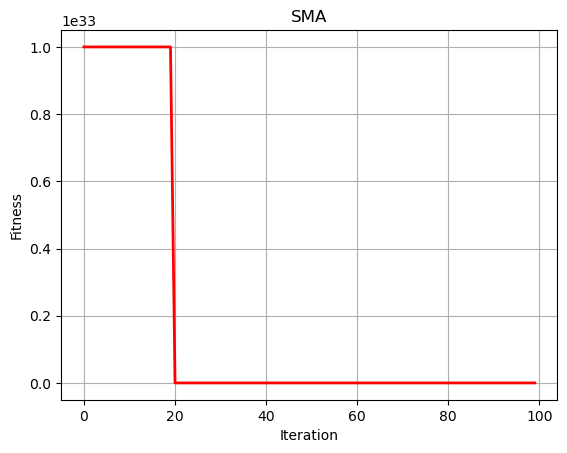

In [12]:
'''基于黏菌优化算法的拉压弹簧设计'''
import numpy as np
from matplotlib import pyplot as plt
import SMA

'''适应度函数'''
def fun(X):
        x1 = X[0]
        x2 = X[1]
        x3 = X[2]
        #约束条件判断
        g1 = 1-(x2**3*x3)/(71785*x1**4)
        g2 = (4*x2**2-x1*x2)/(12566*(x2*x1**3-x1**4))+1/(5108*x1**2)-1
        g3 = 1-(140.45*x1)/(x2**2*x3)
        g4 = (x1+x2)/1.5-1
        if g1<=0 and g2<=0 and g3<=0 and g4<=0:
            #如果满足约束条件则计算适应度值
            fitness = (x3+2)*x2*x1**2
        else:
            #如果不满足约束条件，则设置适应度值为很大的一个惩罚数
            fitness = 10E32
        
        return fitness

'''主函数 '''
#设置参数
pop = 30 #种群数量
MaxIter = 100 #最大迭代次数
dim = 3 #维度
lb = np.array([0.05,0.25,2]) #下边界
ub = np.array([2,1.3,15])#上边界
#适应度函数选择
fobj = fun
GbestScore,GbestPositon,Curve = SMA.SMA(pop,dim,lb,ub,MaxIter,fobj) 
print('最优适应度值：',GbestScore)
print('最优解[x1,x2,x3]：',GbestPositon)

#绘制适应度曲线
plt.figure(1)
plt.plot(Curve,'r-',linewidth=2)
plt.xlabel('Iteration',fontsize='medium')
plt.ylabel("Fitness",fontsize='medium')
plt.grid()
plt.title('SMA',fontsize='large')
plt.show()

## 人工蜂群算法

人工蜂群算法就是模拟蜜蜂的采蜜过程而提出的一种新型智能优化算法，它也是由食物源、雇佣蜂和非雇佣蜂三部分组成。

食物源：食物源即为蜜源。在任何一个优化问题中，问题的可行解都是以一定形式给出的。在人工蜂群算法中，食物源就是待求优化问题的可行解，是人工蜂群算法中所要处理的基本对象。食物源的优劣即可行解的好坏是用蜜源花蜜量的大小即适应度来评价的。

雇佣蜂：雇佣蜂即为引领蜂(采蜜蜂)与食物源的位置相对应，一个食物源对应一个引领蜂。在人工蜂群算法中，食物源的个数与引领蜂的个数相等；引领蜂的任务是发现食物源信息并以一定的概率与跟随蜂分享；概率的计算即为人工蜂群算法中的选择策略，一般是根据适应度值以轮盘赌的方法计算。

非雇佣蜂：非雇佣蜂包括跟随蜂(观察蜂)和侦査蜂跟随蜂在蜂巢的招募区内根据引领蜂提供的蜜源信息来选择食物源，而侦查蜂是在蜂巢附近寻找新的食物源。在人工蜂群算法中，跟随蜂依据引领蜂传递的信息，在食物源附近搜索新食物源，并进行贪婪选择。若一个食物源在经过次后仍未被更新，则此引领蜂变成侦査蜂，侦查蜂寻找新的食物源代替原来的食物源。

人工蜂群算法模拟实际蜜蜂采蜜机制处理函数优化问题，该算法的基本思想是从某个随机产生的初始群体开始，在适应度值较优的一半个体周围搜索，采用一对一的竞争生存策略择优保存个体，该操作称为引领蜂搜索，然后利用轮盘选择方式选择较优个体，并在其周围进行贪婪搜索，产生另一半择优个体，这一过程称为跟随蜂搜索。将引领蜂和跟随蜂产生的个体组成新的种群，以避免种群多样性丧失，并进行侦察蜂的类变异搜索，形成迭代种群。该算法通过不断的迭代计算，保留优质个体，淘汰劣质个体，向全局最优解靠近。

![hello](../../images/人工蜂群算法.jpg)

### 应用案例

同黏菌算法。

最优适应度值： [0.01340771]
最优解[x1,x2,x3]： [[ 0.05        0.31547562 15.        ]]


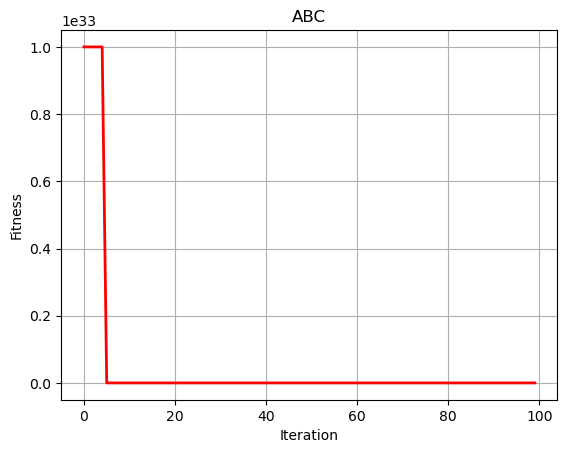

In [13]:
'''基于人工蜂群算法的拉压弹簧设计'''
import numpy as np
from matplotlib import pyplot as plt
import ABC

'''适应度函数'''
def fun(X):
        x1 = X[0]
        x2 = X[1]
        x3 = X[2]
        #约束条件判断
        g1 = 1-(x2**3*x3)/(71785*x1**4)
        g2 = (4*x2**2-x1*x2)/(12566*(x2*x1**3-x1**4))+1/(5108*x1**2)-1
        g3 = 1-(140.45*x1)/(x2**2*x3)
        g4 = (x1+x2)/1.5-1
        if g1<=0 and g2<=0 and g3<=0 and g4<=0:
            #如果满足约束条件则计算适应度值
            fitness = (x3+2)*x2*x1**2
        else:
            #如果不满足约束条件，则设置适应度值为很大的一个惩罚数
            fitness = 10E32
        
        return fitness

'''主函数 '''
#设置参数
pop = 30 #种群数量
MaxIter = 100 #最大迭代次数
dim = 3 #维度
lb = np.array([0.05,0.25,2]) #下边界
ub = np.array([2,1.3,15])#上边界
#适应度函数选择
fobj = fun
GbestScore,GbestPositon,Curve = ABC.ABC(pop,dim,lb,ub,MaxIter,fobj) 
print('最优适应度值：',GbestScore)
print('最优解[x1,x2,x3]：',GbestPositon)

#绘制适应度曲线
plt.figure(1)
plt.plot(Curve,'r-',linewidth=2)
plt.xlabel('Iteration',fontsize='medium')
plt.ylabel("Fitness",fontsize='medium')
plt.grid()
plt.title('ABC',fontsize='large')
plt.show()

## 蝗虫优化算法

蝗虫优化算法（GOA）是由澳大利亚学者等人于2017年提出的群智能优化算法，其基本思想来源于蝗虫群体的觅食行为。因为蝗虫具有群居行为，所以利用蝗虫群体间的排斥力和吸引力将搜索空间分为排斥空间、舒适空间和吸引空间。根据两个蝗虫间的距离变化而改变力的作用并将其抽象为一个函数，以寻找最优解。

![hello](../../images/蝗虫优化算法.png)

### 应用案例

同黏菌算法。

第 0 次迭代
第 1 次迭代
第 2 次迭代
第 3 次迭代
第 4 次迭代
第 5 次迭代
第 6 次迭代
第 7 次迭代
第 8 次迭代
第 9 次迭代
第 10 次迭代
第 11 次迭代
第 12 次迭代
第 13 次迭代
第 14 次迭代
第 15 次迭代
第 16 次迭代
第 17 次迭代
第 18 次迭代
第 19 次迭代
第 20 次迭代
第 21 次迭代
第 22 次迭代
第 23 次迭代
第 24 次迭代
第 25 次迭代
第 26 次迭代
第 27 次迭代
第 28 次迭代
第 29 次迭代
第 30 次迭代
第 31 次迭代
第 32 次迭代
第 33 次迭代
第 34 次迭代
第 35 次迭代
第 36 次迭代
第 37 次迭代
第 38 次迭代
第 39 次迭代
第 40 次迭代
第 41 次迭代
第 42 次迭代
第 43 次迭代
第 44 次迭代
第 45 次迭代
第 46 次迭代
第 47 次迭代
第 48 次迭代
第 49 次迭代
第 50 次迭代
第 51 次迭代
第 52 次迭代
第 53 次迭代
第 54 次迭代
第 55 次迭代
第 56 次迭代
第 57 次迭代
第 58 次迭代
第 59 次迭代
第 60 次迭代
第 61 次迭代
第 62 次迭代
第 63 次迭代
第 64 次迭代
第 65 次迭代
第 66 次迭代
第 67 次迭代
第 68 次迭代
第 69 次迭代
第 70 次迭代
第 71 次迭代
第 72 次迭代
第 73 次迭代
第 74 次迭代
第 75 次迭代
第 76 次迭代
第 77 次迭代
第 78 次迭代
第 79 次迭代
第 80 次迭代
第 81 次迭代
第 82 次迭代
第 83 次迭代
第 84 次迭代
第 85 次迭代
第 86 次迭代
第 87 次迭代
第 88 次迭代
第 89 次迭代
第 90 次迭代
第 91 次迭代
第 92 次迭代
第 93 次迭代
第 94 次迭代
第 95 次迭代
第 96 次迭代
第 97 次迭代
第 98 次迭代
第 99 次迭代
最优适应度值： [0.03744577]
最优解[x1,x2,x3]： [ 0.0612394   0.63293257 13.7755096 ]


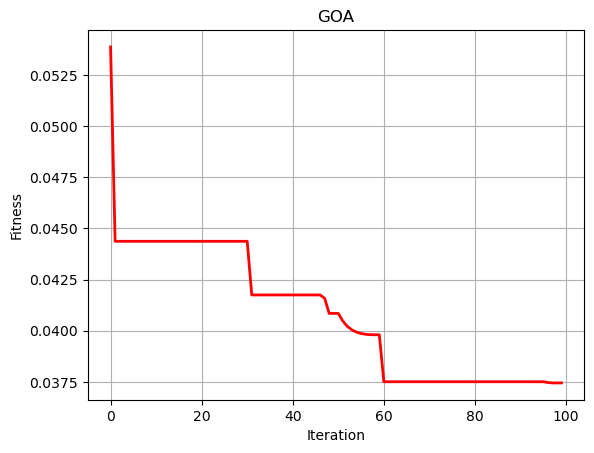

In [16]:
'''基于蝗虫优化算法的拉压弹簧设计'''
import numpy as np
from matplotlib import pyplot as plt
import GOA

'''适应度函数'''
def fun(X):
        x1 = X[0]
        x2 = X[1]
        x3 = X[2]
        #约束条件判断
        g1 = 1-(x2**3*x3)/(71785*x1**4)
        g2 = (4*x2**2-x1*x2)/(12566*(x2*x1**3-x1**4))+1/(5108*x1**2)-1
        g3 = 1-(140.45*x1)/(x2**2*x3)
        g4 = (x1+x2)/1.5-1
        if g1<=0 and g2<=0 and g3<=0 and g4<=0:
            #如果满足约束条件则计算适应度值
            fitness = (x3+2)*x2*x1**2
        else:
            #如果不满足约束条件，则设置适应度值为很大的一个惩罚数
            fitness = 10E32
        
        return fitness

'''主函数 '''
#设置参数
pop = 30 #种群数量
MaxIter = 100 #最大迭代次数
dim = 3 #维度
lb = np.array([0.05,0.25,2]) #下边界
ub = np.array([2,1.3,15])#上边界
#适应度函数选择
fobj = fun
GbestScore,GbestPositon,Curve = GOA.GOA(pop,dim,lb,ub,MaxIter,fobj) 
print('最优适应度值：',GbestScore)
print('最优解[x1,x2,x3]：',GbestPositon)

#绘制适应度曲线
plt.figure(1)
plt.plot(Curve,'r-',linewidth=2)
plt.xlabel('Iteration',fontsize='medium')
plt.ylabel("Fitness",fontsize='medium')
plt.grid()
plt.title('GOA',fontsize='large')
plt.show()

## 蝴蝶优化算法

蝴蝶优化算法（BOA）由印度学者等人于2019年提出的一种新型智能优化算法。该算法通过模拟蝴蝶的觅食行为来对最优问题求解。该算法具有收敛速度快，寻优能力强的特点。

在蝴蝶优化算法中，一只蝴蝶对应解空间的一个搜索单位。每只蝴蝶可以释放一定强度的香味，这个香味和适应度函数有关，并且当蝴蝶在解空间内移动时，其适应度值也会随之改变。在这个过程中，香味会传播一定的距离，并且随着蝴蝶之间的距离递减，其他的蝴蝶可以感知到这种香味，这也就是蝴蝶优化算法中的蝴蝶在整个解空间中和其他蝴蝶交换信息的方式。当一只蝴蝶感知到其他蝴蝶身上散发的香味时，它会直接向这个散发出香味的蝴蝶移动，这个过程在蝴蝶优化算法中被称为全局搜索；当蝴蝶感受不到其他蝴蝶身上散发出的香味时，它会在自己附近做随即搜索，这个过程在蝴蝶优化算法中被称为局部搜索。

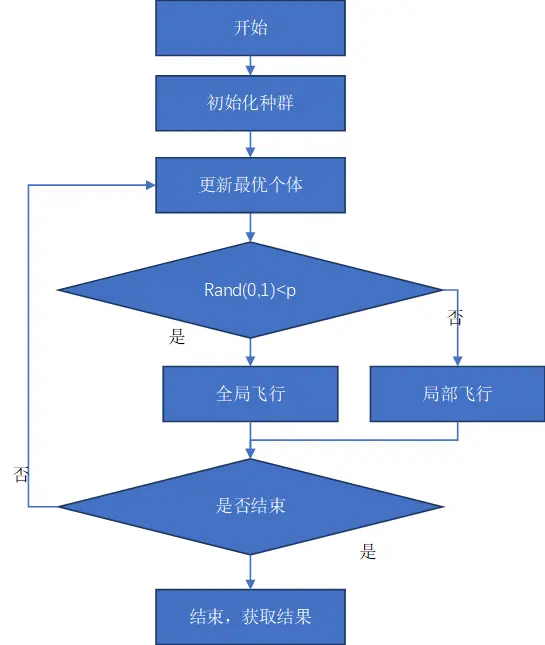

### 应用案例

同黏菌算法。

第0次迭代
第1次迭代
第2次迭代
第3次迭代
第4次迭代
第5次迭代
第6次迭代
第7次迭代
第8次迭代
第9次迭代
第10次迭代
第11次迭代
第12次迭代
第13次迭代
第14次迭代
第15次迭代
第16次迭代
第17次迭代
第18次迭代
第19次迭代
第20次迭代
第21次迭代
第22次迭代
第23次迭代
第24次迭代
第25次迭代
第26次迭代
第27次迭代
第28次迭代
第29次迭代
第30次迭代
第31次迭代
第32次迭代
第33次迭代
第34次迭代
第35次迭代
第36次迭代
第37次迭代
第38次迭代
第39次迭代
第40次迭代
第41次迭代
第42次迭代
第43次迭代
第44次迭代
第45次迭代
第46次迭代
第47次迭代
第48次迭代
第49次迭代
第50次迭代
第51次迭代
第52次迭代
第53次迭代
第54次迭代
第55次迭代
第56次迭代
第57次迭代
第58次迭代
第59次迭代
第60次迭代
第61次迭代
第62次迭代
第63次迭代
第64次迭代
第65次迭代
第66次迭代
第67次迭代
第68次迭代
第69次迭代
第70次迭代
第71次迭代
第72次迭代
第73次迭代
第74次迭代
第75次迭代
第76次迭代
第77次迭代
第78次迭代
第79次迭代
第80次迭代
第81次迭代
第82次迭代
第83次迭代
第84次迭代
第85次迭代
第86次迭代
第87次迭代
第88次迭代
第89次迭代
第90次迭代
第91次迭代
第92次迭代
第93次迭代
第94次迭代
第95次迭代
第96次迭代
第97次迭代
第98次迭代
第99次迭代
第100次迭代
第101次迭代
第102次迭代
第103次迭代
第104次迭代
第105次迭代
第106次迭代
第107次迭代
第108次迭代
第109次迭代
第110次迭代
第111次迭代
第112次迭代
第113次迭代
第114次迭代
第115次迭代
第116次迭代
第117次迭代
第118次迭代
第119次迭代
第120次迭代
第121次迭代
第122次迭代
第123次迭代
第124次迭代
第125次迭代
第126次迭代
第127次迭代
第128次迭代
第129次迭代
第130次迭代
第131次迭代
第132次迭代
第133次迭代
第134次迭代
第135次迭代
第136次迭代
第137次迭代
第138次迭

第1122次迭代
第1123次迭代
第1124次迭代
第1125次迭代
第1126次迭代
第1127次迭代
第1128次迭代
第1129次迭代
第1130次迭代
第1131次迭代
第1132次迭代
第1133次迭代
第1134次迭代
第1135次迭代
第1136次迭代
第1137次迭代
第1138次迭代
第1139次迭代
第1140次迭代
第1141次迭代
第1142次迭代
第1143次迭代
第1144次迭代
第1145次迭代
第1146次迭代
第1147次迭代
第1148次迭代
第1149次迭代
第1150次迭代
第1151次迭代
第1152次迭代
第1153次迭代
第1154次迭代
第1155次迭代
第1156次迭代
第1157次迭代
第1158次迭代
第1159次迭代
第1160次迭代
第1161次迭代
第1162次迭代
第1163次迭代
第1164次迭代
第1165次迭代
第1166次迭代
第1167次迭代
第1168次迭代
第1169次迭代
第1170次迭代
第1171次迭代
第1172次迭代
第1173次迭代
第1174次迭代
第1175次迭代
第1176次迭代
第1177次迭代
第1178次迭代
第1179次迭代
第1180次迭代
第1181次迭代
第1182次迭代
第1183次迭代
第1184次迭代
第1185次迭代
第1186次迭代
第1187次迭代
第1188次迭代
第1189次迭代
第1190次迭代
第1191次迭代
第1192次迭代
第1193次迭代
第1194次迭代
第1195次迭代
第1196次迭代
第1197次迭代
第1198次迭代
第1199次迭代
第1200次迭代
第1201次迭代
第1202次迭代
第1203次迭代
第1204次迭代
第1205次迭代
第1206次迭代
第1207次迭代
第1208次迭代
第1209次迭代
第1210次迭代
第1211次迭代
第1212次迭代
第1213次迭代
第1214次迭代
第1215次迭代
第1216次迭代
第1217次迭代
第1218次迭代
第1219次迭代
第1220次迭代
第1221次迭代
第1222次迭代
第1223次迭代
第1224次迭代
第1225次迭代
第1226次迭代
第1227次迭代
第1228次迭代
第1229次迭代
第1230次迭代
第1231次迭代
第1232次迭代
第

第2122次迭代
第2123次迭代
第2124次迭代
第2125次迭代
第2126次迭代
第2127次迭代
第2128次迭代
第2129次迭代
第2130次迭代
第2131次迭代
第2132次迭代
第2133次迭代
第2134次迭代
第2135次迭代
第2136次迭代
第2137次迭代
第2138次迭代
第2139次迭代
第2140次迭代
第2141次迭代
第2142次迭代
第2143次迭代
第2144次迭代
第2145次迭代
第2146次迭代
第2147次迭代
第2148次迭代
第2149次迭代
第2150次迭代
第2151次迭代
第2152次迭代
第2153次迭代
第2154次迭代
第2155次迭代
第2156次迭代
第2157次迭代
第2158次迭代
第2159次迭代
第2160次迭代
第2161次迭代
第2162次迭代
第2163次迭代
第2164次迭代
第2165次迭代
第2166次迭代
第2167次迭代
第2168次迭代
第2169次迭代
第2170次迭代
第2171次迭代
第2172次迭代
第2173次迭代
第2174次迭代
第2175次迭代
第2176次迭代
第2177次迭代
第2178次迭代
第2179次迭代
第2180次迭代
第2181次迭代
第2182次迭代
第2183次迭代
第2184次迭代
第2185次迭代
第2186次迭代
第2187次迭代
第2188次迭代
第2189次迭代
第2190次迭代
第2191次迭代
第2192次迭代
第2193次迭代
第2194次迭代
第2195次迭代
第2196次迭代
第2197次迭代
第2198次迭代
第2199次迭代
第2200次迭代
第2201次迭代
第2202次迭代
第2203次迭代
第2204次迭代
第2205次迭代
第2206次迭代
第2207次迭代
第2208次迭代
第2209次迭代
第2210次迭代
第2211次迭代
第2212次迭代
第2213次迭代
第2214次迭代
第2215次迭代
第2216次迭代
第2217次迭代
第2218次迭代
第2219次迭代
第2220次迭代
第2221次迭代
第2222次迭代
第2223次迭代
第2224次迭代
第2225次迭代
第2226次迭代
第2227次迭代
第2228次迭代
第2229次迭代
第2230次迭代
第2231次迭代
第2232次迭代
第

第3100次迭代
第3101次迭代
第3102次迭代
第3103次迭代
第3104次迭代
第3105次迭代
第3106次迭代
第3107次迭代
第3108次迭代
第3109次迭代
第3110次迭代
第3111次迭代
第3112次迭代
第3113次迭代
第3114次迭代
第3115次迭代
第3116次迭代
第3117次迭代
第3118次迭代
第3119次迭代
第3120次迭代
第3121次迭代
第3122次迭代
第3123次迭代
第3124次迭代
第3125次迭代
第3126次迭代
第3127次迭代
第3128次迭代
第3129次迭代
第3130次迭代
第3131次迭代
第3132次迭代
第3133次迭代
第3134次迭代
第3135次迭代
第3136次迭代
第3137次迭代
第3138次迭代
第3139次迭代
第3140次迭代
第3141次迭代
第3142次迭代
第3143次迭代
第3144次迭代
第3145次迭代
第3146次迭代
第3147次迭代
第3148次迭代
第3149次迭代
第3150次迭代
第3151次迭代
第3152次迭代
第3153次迭代
第3154次迭代
第3155次迭代
第3156次迭代
第3157次迭代
第3158次迭代
第3159次迭代
第3160次迭代
第3161次迭代
第3162次迭代
第3163次迭代
第3164次迭代
第3165次迭代
第3166次迭代
第3167次迭代
第3168次迭代
第3169次迭代
第3170次迭代
第3171次迭代
第3172次迭代
第3173次迭代
第3174次迭代
第3175次迭代
第3176次迭代
第3177次迭代
第3178次迭代
第3179次迭代
第3180次迭代
第3181次迭代
第3182次迭代
第3183次迭代
第3184次迭代
第3185次迭代
第3186次迭代
第3187次迭代
第3188次迭代
第3189次迭代
第3190次迭代
第3191次迭代
第3192次迭代
第3193次迭代
第3194次迭代
第3195次迭代
第3196次迭代
第3197次迭代
第3198次迭代
第3199次迭代
第3200次迭代
第3201次迭代
第3202次迭代
第3203次迭代
第3204次迭代
第3205次迭代
第3206次迭代
第3207次迭代
第3208次迭代
第3209次迭代
第3210次迭代
第

第4049次迭代
第4050次迭代
第4051次迭代
第4052次迭代
第4053次迭代
第4054次迭代
第4055次迭代
第4056次迭代
第4057次迭代
第4058次迭代
第4059次迭代
第4060次迭代
第4061次迭代
第4062次迭代
第4063次迭代
第4064次迭代
第4065次迭代
第4066次迭代
第4067次迭代
第4068次迭代
第4069次迭代
第4070次迭代
第4071次迭代
第4072次迭代
第4073次迭代
第4074次迭代
第4075次迭代
第4076次迭代
第4077次迭代
第4078次迭代
第4079次迭代
第4080次迭代
第4081次迭代
第4082次迭代
第4083次迭代
第4084次迭代
第4085次迭代
第4086次迭代
第4087次迭代
第4088次迭代
第4089次迭代
第4090次迭代
第4091次迭代
第4092次迭代
第4093次迭代
第4094次迭代
第4095次迭代
第4096次迭代
第4097次迭代
第4098次迭代
第4099次迭代
第4100次迭代
第4101次迭代
第4102次迭代
第4103次迭代
第4104次迭代
第4105次迭代
第4106次迭代
第4107次迭代
第4108次迭代
第4109次迭代
第4110次迭代
第4111次迭代
第4112次迭代
第4113次迭代
第4114次迭代
第4115次迭代
第4116次迭代
第4117次迭代
第4118次迭代
第4119次迭代
第4120次迭代
第4121次迭代
第4122次迭代
第4123次迭代
第4124次迭代
第4125次迭代
第4126次迭代
第4127次迭代
第4128次迭代
第4129次迭代
第4130次迭代
第4131次迭代
第4132次迭代
第4133次迭代
第4134次迭代
第4135次迭代
第4136次迭代
第4137次迭代
第4138次迭代
第4139次迭代
第4140次迭代
第4141次迭代
第4142次迭代
第4143次迭代
第4144次迭代
第4145次迭代
第4146次迭代
第4147次迭代
第4148次迭代
第4149次迭代
第4150次迭代
第4151次迭代
第4152次迭代
第4153次迭代
第4154次迭代
第4155次迭代
第4156次迭代
第4157次迭代
第4158次迭代
第4159次迭代
第

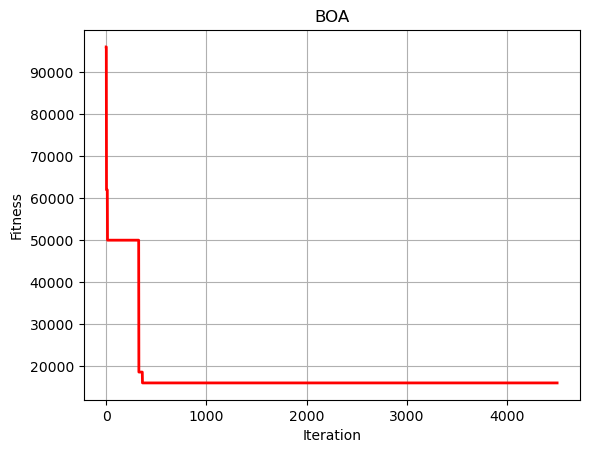

In [23]:
'''蝴蝶优化算法求解压力容器设计'''
import numpy as np
from matplotlib import pyplot as plt
import BOA

'''适应度函数'''
def fun(X):
        x1 = X[0] #Ts
        x2 = X[1] #Th
        x3 = X[2] #R
        x4 = X[3] #L      
        #约束条件判断
        g1 = -x1+0.0193*x3
        g2 = -x2+0.00954*x3
        g3 = -np.math.pi*x3**2-4*np.math.pi*x3**3/3+1296000
        g4 = x4-240
        if g1<=0 and g2<=0 and g3<=0 and g4<=0:
            #如果满足约束条件则计算适应度值
            fitness = 0.6224*x1*x3*x4 + 1.7781*x2*x3**2 + 3.1661*x1**2*x4 + 19.84*x1**2*x3
        else:
            #如果不满足约束条件，则设置适应度值为很大的一个惩罚数
            fitness = 10E32
        
        return fitness

'''主函数 '''
#设置参数
pop = 50 #种群数量
MaxIter = 4500 #最大迭代次数
dim = 4 #维度
lb = np.array([0,0,10,10]) #下边界
ub = np.array([100,100,100,100])#上边界
#适应度函数选择
fobj = fun
GbestScore,GbestPositon,Curve = BOA.BOA(pop,dim,lb,ub,MaxIter,fobj) 
print('最优适应度值：',GbestScore)
print('最优解[Ts,Th,R,L]：',GbestPositon)

#绘制适应度曲线
plt.figure(1)
plt.plot(Curve,'r-',linewidth=2)
plt.xlabel('Iteration',fontsize='medium')
plt.ylabel("Fitness",fontsize='medium')
plt.grid()
plt.title('BOA',fontsize='large')
plt.show()

## 飞蛾扑火优化算法

飞蛾扑火优化(Moth-ﬂame optimization，MFO)，由Seyedali Mirjalili在2015年提出，为优化领域提供了一种新的启发式搜索范式：螺旋搜索。

飞蛾在夜间有一种特殊的导航方式：横向定向。即它会与月亮(光源)保持一定的角度飞行，从而能够保持直线的飞行路径，但是，这种方式只在光源离飞蛾较远的情况下才有效。当有人造光源存在时，飞蛾会被人工灯光所欺骗，一直保持与人造灯光相同的角度飞行，由于它与光源的距离过近，它飞行的路径已经不是直线，而是一种螺旋的路径。

受这种自然现象的启发，Seyedali Mirjalili将飞蛾绕着光源螺旋飞行的过程抽象成为一个寻优的过程，飞蛾飞行的整个空间即是问题的解空间，一只飞蛾即是问题的一个解，而火焰(光源)即是问题的一个较优解，每一只飞蛾对应一个光源，避免了算法陷入局部最优；当飞蛾与火焰足够多的时候，飞蛾的飞行能够搜索解空间的绝大部分区域，从而保证了算法的探索能力；而在寻优的过程中，火焰数随着迭代次数的增加而减少，使飞蛾能够充分搜索更优解的邻域空间，保证了算法的利用能力。

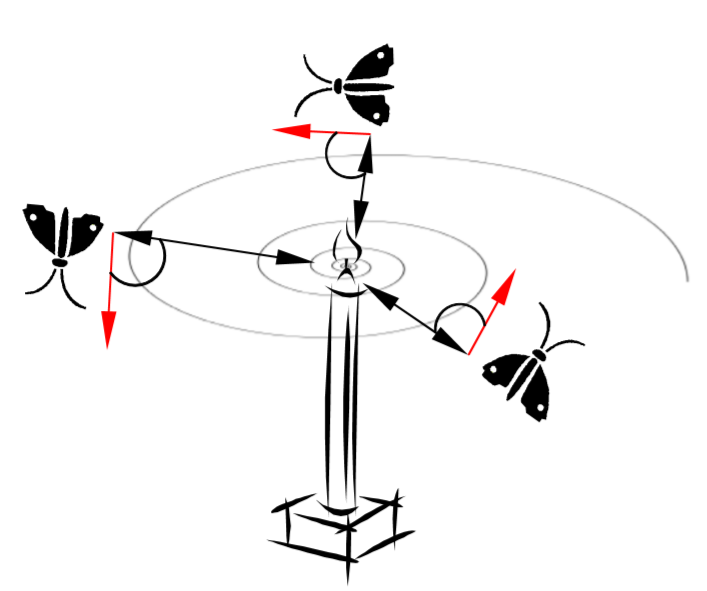

### 应用案例

同黏菌算法。

第0次迭代
第1次迭代
第2次迭代
第3次迭代
第4次迭代
第5次迭代
第6次迭代
第7次迭代
第8次迭代
第9次迭代
第10次迭代
第11次迭代
第12次迭代
第13次迭代
第14次迭代
第15次迭代
第16次迭代
第17次迭代
第18次迭代
第19次迭代
第20次迭代
第21次迭代
第22次迭代
第23次迭代
第24次迭代
第25次迭代
第26次迭代
第27次迭代
第28次迭代
第29次迭代
第30次迭代
第31次迭代
第32次迭代
第33次迭代
第34次迭代
第35次迭代
第36次迭代
第37次迭代
第38次迭代
第39次迭代
第40次迭代
第41次迭代
第42次迭代
第43次迭代
第44次迭代
第45次迭代
第46次迭代
第47次迭代
第48次迭代
第49次迭代
第50次迭代
第51次迭代
第52次迭代
第53次迭代
第54次迭代
第55次迭代
第56次迭代
第57次迭代
第58次迭代
第59次迭代
第60次迭代
第61次迭代
第62次迭代
第63次迭代
第64次迭代
第65次迭代
第66次迭代
第67次迭代
第68次迭代
第69次迭代
第70次迭代
第71次迭代
第72次迭代
第73次迭代
第74次迭代
第75次迭代
第76次迭代
第77次迭代
第78次迭代
第79次迭代
第80次迭代
第81次迭代
第82次迭代
第83次迭代
第84次迭代
第85次迭代
第86次迭代
第87次迭代
第88次迭代
第89次迭代
第90次迭代
第91次迭代
第92次迭代
第93次迭代
第94次迭代
第95次迭代
第96次迭代
第97次迭代
第98次迭代
第99次迭代
最优适应度值： [3.34792071e-06]
最优解[x1,x2]： [[ 0.00082743 -0.00163195]]


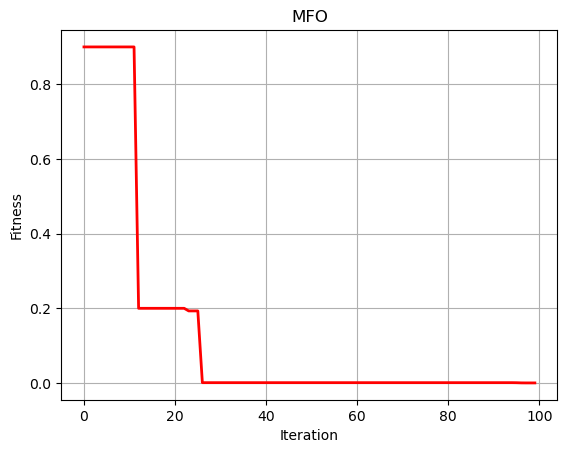

In [24]:
import numpy as np
from matplotlib import pyplot as plt
import MFO

'''适应度函数'''
def fun(X):
        O=X[0]**2 + X[1]**2
        return O

'''飞蛾扑火优化算法求解x1^2 + x2^2的最小值'''
'''主函数 '''
#设置参数
pop = 50 #种群数量
MaxIter = 100 #最大迭代次数
dim = 2 #维度
lb = -10*np.ones(dim) #下边界
ub = 10*np.ones(dim)#上边界
#适应度函数选择
fobj = fun
GbestScore,GbestPositon,Curve = MFO.MFO(pop,dim,lb,ub,MaxIter,fobj) 
print('最优适应度值：',GbestScore)
print('最优解[x1,x2]：',GbestPositon)

#绘制适应度曲线
plt.figure(1)
plt.plot(Curve,'r-',linewidth=2)
plt.xlabel('Iteration',fontsize='medium')
plt.ylabel("Fitness",fontsize='medium')
plt.grid()
plt.title('MFO',fontsize='large')
plt.show()

## 海鸥优化算法

海鸥优化算法（SOA）是一种全新的元启发式智能优化算法，它是一种通过模拟海鸥迁徙和攻击行为来求解优化问题的算法。

海鸥是遍布全球的海鸟，海鸥种类繁多且大小和身长各不相同。 海鸥是杂食动物，吃昆虫、鱼、爬行动物、两栖动物和蚯蚓等。 大多数海鸥的身体覆盖着白色的羽毛，经常用面包屑来吸引鱼群， 用脚发出雨水落下的声音来吸引藏在地下的蚯蚓。海鸥可以喝淡水和盐水，通过眼睛上方的一对特殊腺体，将盐从它们的体内排出。 海鸥以群居式生活，利用智慧来寻找和攻击猎物。 海鸥最重要特征是迁徙和攻击行为，迁徙是动物从一个地方到另一个地方根据季节更替而移动，寻找最丰富的食物来源以便获取足够能量。在迁移期间，动物成群结队地出行。迁徙时每只海鸥的所在位置不同，以避免相互碰撞。 在一个群体中，海鸥可以朝着最佳位置的方向前进，改变自身所在的位置。海鸥经常会攻击候鸟，在进攻时海鸥群体做出螺旋形的运动形态（如图）。

![hello](../../images/海鸥优化算法.png)

### 应用案例

同黏菌算法。

第0次迭代
第1次迭代
第2次迭代
第3次迭代
第4次迭代
第5次迭代
第6次迭代
第7次迭代
第8次迭代
第9次迭代
第10次迭代
第11次迭代
第12次迭代
第13次迭代
第14次迭代
第15次迭代
第16次迭代
第17次迭代
第18次迭代
第19次迭代
第20次迭代
第21次迭代
第22次迭代
第23次迭代
第24次迭代
第25次迭代
第26次迭代
第27次迭代
第28次迭代
第29次迭代
第30次迭代
第31次迭代
第32次迭代
第33次迭代
第34次迭代
第35次迭代
第36次迭代
第37次迭代
第38次迭代
第39次迭代
第40次迭代
第41次迭代
第42次迭代
第43次迭代
第44次迭代
第45次迭代
第46次迭代
第47次迭代
第48次迭代
第49次迭代
第50次迭代
第51次迭代
第52次迭代
第53次迭代
第54次迭代
第55次迭代
第56次迭代
第57次迭代
第58次迭代
第59次迭代
第60次迭代
第61次迭代
第62次迭代
第63次迭代
第64次迭代
第65次迭代
第66次迭代
第67次迭代
第68次迭代
第69次迭代
第70次迭代
第71次迭代
第72次迭代
第73次迭代
第74次迭代
第75次迭代
第76次迭代
第77次迭代
第78次迭代
第79次迭代
第80次迭代
第81次迭代
第82次迭代
第83次迭代
第84次迭代
第85次迭代
第86次迭代
第87次迭代
第88次迭代
第89次迭代
第90次迭代
第91次迭代
第92次迭代
第93次迭代
第94次迭代
第95次迭代
第96次迭代
第97次迭代
第98次迭代
第99次迭代
最优适应度值： [1.41785588e-72]
最优解[x1,x2]： [[ 1.05760228e-36 -5.47113597e-37]]


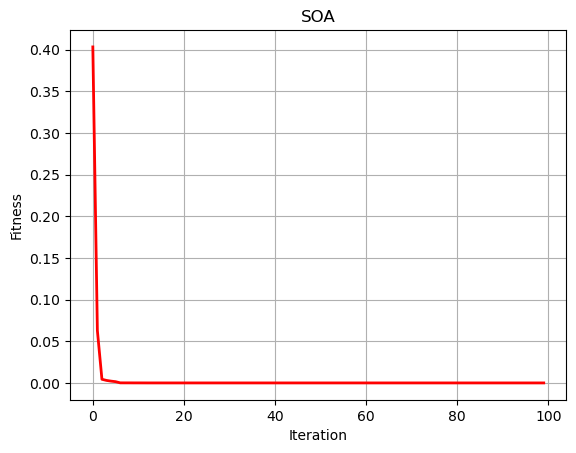

In [25]:
import numpy as np
from matplotlib import pyplot as plt
import SOA

'''适应度函数'''
def fun(X):
        O=X[0]**2 + X[1]**2
        return O

'''海鸥优化算法求解x1^2 + x2^2的最小值'''
'''主函数 '''
#设置参数
pop = 50 #种群数量
MaxIter = 100 #最大迭代次数
dim = 2 #维度
lb = -10*np.ones(dim) #下边界
ub = 10*np.ones(dim)#上边界
#适应度函数选择
fobj = fun
GbestScore,GbestPositon,Curve = SOA.SOA(pop,dim,lb,ub,MaxIter,fobj) 
print('最优适应度值：',GbestScore)
print('最优解[x1,x2]：',GbestPositon)

#绘制适应度曲线
plt.figure(1)
plt.plot(Curve,'r-',linewidth=2)
plt.xlabel('Iteration',fontsize='medium')
plt.ylabel("Fitness",fontsize='medium')
plt.grid()
plt.title('SOA',fontsize='large')
plt.show()

## 麻雀搜索算法

麻雀搜索算法(Sparrow Search Algorithm, SSA)是于2020年提出的。SSA 主要是受麻雀的觅食行为和反捕食行为的启发而提出的。该算法比较新颖，具有寻优能力强，收敛速度快的优点。

建立麻雀搜索算法的数学模型，主要规则如下所述：

- 发现者通常拥有较高的能源储备并且在整个种群中负责搜索到具有丰富食物的区域，为所有的加入者提供觅食的区域和方向。在模型建立中能量储备的高低取决于麻雀个体所对应的适应度值(Fitness Value)的好坏。
- 一旦麻雀发现了捕食者，个体开始发出鸣叫作为报警信号。当报警值大于安全值时，发现者会将加入者带到其它安全区域进行觅食。
- 发现者和加入者的身份是动态变化的。只要能够寻找到更好的食物来源，每只麻雀都可以成为发现者，但是发现者和加入者所占整个种群数量的比重是不变的。也就是说，有一只麻雀变成发现者必然有另一只麻雀变成加入者。
- 加入者的能量越低，它们在整个种群中所处的觅食位置就越差。一些饥肠辘辘的加入者更有可能飞往其它地方觅食，以获得更多的能量。
- 在觅食过程中，加入者总是能够搜索到提供最好食物的发现者，然后从最好的食物中获取食物或者在该发现者周围觅食。与此同时，一些加入者为了增加自己的捕食率可能会不断地监控发现者进而去争夺食物资源。
- 当意识到危险时，群体边缘的麻雀会迅速向安全区域移动，以获得更好的位置，位于种群中间的麻雀则会随机走动，以靠近其它麻雀。

### 应用案例

同黏菌算法。

第0次迭代
第1次迭代
第2次迭代
第3次迭代
第4次迭代
第5次迭代
第6次迭代
第7次迭代
第8次迭代
第9次迭代
第10次迭代
第11次迭代
第12次迭代
第13次迭代
第14次迭代
第15次迭代
第16次迭代
第17次迭代
第18次迭代
第19次迭代
第20次迭代
第21次迭代
第22次迭代
第23次迭代
第24次迭代
第25次迭代
第26次迭代
第27次迭代
第28次迭代
第29次迭代
第30次迭代
第31次迭代
第32次迭代
第33次迭代
第34次迭代
第35次迭代
第36次迭代
第37次迭代
第38次迭代
第39次迭代
第40次迭代
第41次迭代
第42次迭代
第43次迭代
第44次迭代
第45次迭代
第46次迭代
第47次迭代
第48次迭代
第49次迭代
第50次迭代
第51次迭代
第52次迭代
第53次迭代
第54次迭代
第55次迭代
第56次迭代
第57次迭代
第58次迭代
第59次迭代
第60次迭代
第61次迭代
第62次迭代
第63次迭代
第64次迭代
第65次迭代
第66次迭代
第67次迭代
第68次迭代
第69次迭代
第70次迭代
第71次迭代
第72次迭代
第73次迭代
第74次迭代
第75次迭代
第76次迭代
第77次迭代
第78次迭代
第79次迭代
第80次迭代
第81次迭代
第82次迭代
第83次迭代
第84次迭代
第85次迭代
第86次迭代
第87次迭代
第88次迭代
第89次迭代
第90次迭代
第91次迭代
第92次迭代
第93次迭代
第94次迭代
第95次迭代
第96次迭代
第97次迭代
第98次迭代
第99次迭代
最优适应度值： [2.0636504e-13]
最优解[x1,x2]： [[-3.21220359e-07 -3.21220362e-07]]


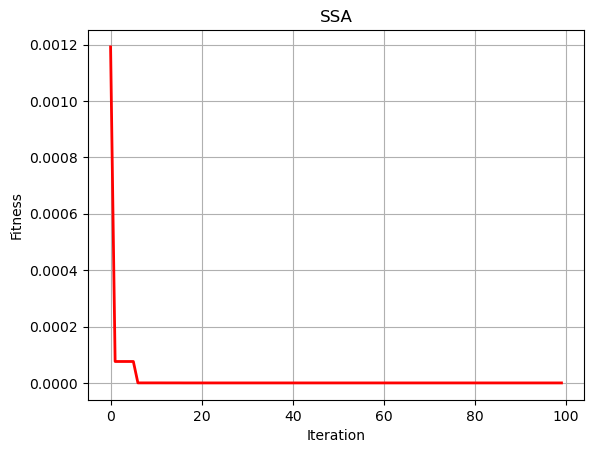

In [27]:
import numpy as np
from matplotlib import pyplot as plt
import SSA

'''适应度函数'''
def fun(X):
        O=X[0]**2 + X[1]**2
        return O

'''麻雀搜索算法求解x1^2 + x2^2的最小值'''
'''主函数 '''
#设置参数
pop = 50 #种群数量
MaxIter = 100 #最大迭代次数
dim = 2 #维度
lb = -10*np.ones(dim) #下边界
ub = 10*np.ones(dim)#上边界
#适应度函数选择
fobj = fun
GbestScore,GbestPositon,Curve = SSA.SSA(pop,dim,lb,ub,MaxIter,fobj) 
print('最优适应度值：',GbestScore)
print('最优解[x1,x2]：',GbestPositon)

#绘制适应度曲线
plt.figure(1)
plt.plot(Curve,'r-',linewidth=2)
plt.xlabel('Iteration',fontsize='medium')
plt.ylabel("Fitness",fontsize='medium')
plt.grid()
plt.title('SSA',fontsize='large')
plt.show()

## 鲸鱼优化算法

鲸鱼优化算法(WOA)是由Mirjalili和Lewis于2016年提出的一种新型群体智能优化搜索方法,它源于对自然界中座头鲸群体狩猎行为的模拟，该算法整个过程包含搜索觅食、收缩包围和螺旋更新位置三个阶段。

鲸鱼优化算法的三个种群更新机制相互独立，因此其寻优阶段的全局探索和局部开发过程得以分别运行及控制。此外, 鲸鱼优化算法不需要人为的设置各种控制参数值, 提高了算法的使用效率并降低了应用难度。与其它群体智能优化算法相比, WOA算法结构新颖, 控制参数少，在许多数值优化和工程问题的求解中表现出较好的寻优性能，优于蚁群算法和粒子群算法等智能优化算法。

![hello](../../images/鲸鱼优化算法.png)

### 应用案例

同黏菌算法。

第0次迭代
第1次迭代
第2次迭代
第3次迭代
第4次迭代
第5次迭代
第6次迭代
第7次迭代
第8次迭代
第9次迭代
第10次迭代
第11次迭代
第12次迭代
第13次迭代
第14次迭代
第15次迭代
第16次迭代
第17次迭代
第18次迭代
第19次迭代
第20次迭代
第21次迭代
第22次迭代
第23次迭代
第24次迭代
第25次迭代
第26次迭代
第27次迭代
第28次迭代
第29次迭代
第30次迭代
第31次迭代
第32次迭代
第33次迭代
第34次迭代
第35次迭代
第36次迭代
第37次迭代
第38次迭代
第39次迭代
第40次迭代
第41次迭代
第42次迭代
第43次迭代
第44次迭代
第45次迭代
第46次迭代
第47次迭代
第48次迭代
第49次迭代
第50次迭代
第51次迭代
第52次迭代
第53次迭代
第54次迭代
第55次迭代
第56次迭代
第57次迭代
第58次迭代
第59次迭代
第60次迭代
第61次迭代
第62次迭代
第63次迭代
第64次迭代
第65次迭代
第66次迭代
第67次迭代
第68次迭代
第69次迭代
第70次迭代
第71次迭代
第72次迭代
第73次迭代
第74次迭代
第75次迭代
第76次迭代
第77次迭代
第78次迭代
第79次迭代
第80次迭代
第81次迭代
第82次迭代
第83次迭代
第84次迭代
第85次迭代
第86次迭代
第87次迭代
第88次迭代
第89次迭代
第90次迭代
第91次迭代
第92次迭代
第93次迭代
第94次迭代
第95次迭代
第96次迭代
第97次迭代
第98次迭代
第99次迭代
最优适应度值： [2.65015109e-53]
最优解[x1,x2]： [[3.37138020e-27 3.89041212e-27]]


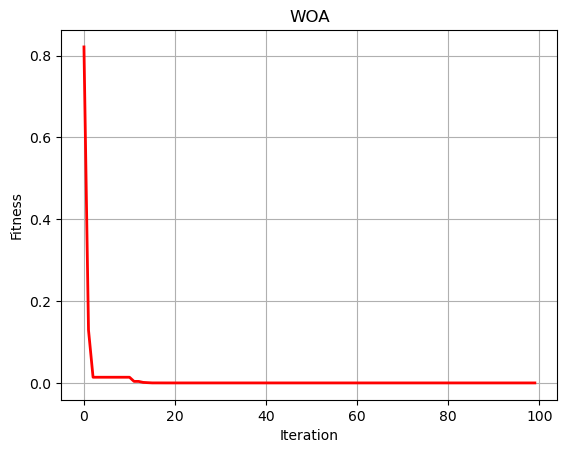

In [28]:
import numpy as np
from matplotlib import pyplot as plt
import WOA

'''适应度函数'''
def fun(X):
        O=X[0]**2 + X[1]**2
        return O

'''鲸鱼优化算法求解x1^2 + x2^2的最小值'''
'''主函数 '''
#设置参数
pop = 50 #种群数量
MaxIter = 100 #最大迭代次数
dim = 2 #维度
lb = -10*np.ones(dim) #下边界
ub = 10*np.ones(dim)#上边界
#适应度函数选择
fobj = fun
GbestScore,GbestPositon,Curve = WOA.WOA(pop,dim,lb,ub,MaxIter,fobj) 
print('最优适应度值：',GbestScore)
print('最优解[x1,x2]：',GbestPositon)

#绘制适应度曲线
plt.figure(1)
plt.plot(Curve,'r-',linewidth=2)
plt.xlabel('Iteration',fontsize='medium')
plt.ylabel("Fitness",fontsize='medium')
plt.grid()
plt.title('WOA',fontsize='large')
plt.show()

## 黄金正弦算法

黄金正弦算法(GSA)是Tanyildizi等人于2017年提出的新型元启发式算法，该算法的设计灵感来源于数学中的正弦函数，该算法利用数学中的正弦函数进行计算迭代寻优，其优点是收敛速度快、鲁棒性好、易于实现、调节的参数和运算符少。

GSA根据正弦函数与单位圆的关系，可以遍历正弦函数上的所有值即寻遍单位圆上所有的点，同时在其位置更新过程中引入黄金分割数缩小解决方案的空间，以便扫描可能只产生良好结果的区域，很大程度上提高了搜索速度，且使搜索和开发达到良好的平衡。

### 应用案例

同黏菌算法。

第0次迭代
第1次迭代
第2次迭代
第3次迭代
第4次迭代
第5次迭代
第6次迭代
第7次迭代
第8次迭代
第9次迭代
第10次迭代
第11次迭代
第12次迭代
第13次迭代
第14次迭代
第15次迭代
第16次迭代
第17次迭代
第18次迭代
第19次迭代
第20次迭代
第21次迭代
第22次迭代
第23次迭代
第24次迭代
第25次迭代
第26次迭代
第27次迭代
第28次迭代
第29次迭代
第30次迭代
第31次迭代
第32次迭代
第33次迭代
第34次迭代
第35次迭代
第36次迭代
第37次迭代
第38次迭代
第39次迭代
第40次迭代
第41次迭代
第42次迭代
第43次迭代
第44次迭代
第45次迭代
第46次迭代
第47次迭代
第48次迭代
第49次迭代
第50次迭代
第51次迭代
第52次迭代
第53次迭代
第54次迭代
第55次迭代
第56次迭代
第57次迭代
第58次迭代
第59次迭代
第60次迭代
第61次迭代
第62次迭代
第63次迭代
第64次迭代
第65次迭代
第66次迭代
第67次迭代
第68次迭代
第69次迭代
第70次迭代
第71次迭代
第72次迭代
第73次迭代
第74次迭代
第75次迭代
第76次迭代
第77次迭代
第78次迭代
第79次迭代
第80次迭代
第81次迭代
第82次迭代
第83次迭代
第84次迭代
第85次迭代
第86次迭代
第87次迭代
第88次迭代
第89次迭代
第90次迭代
第91次迭代
第92次迭代
第93次迭代
第94次迭代
第95次迭代
第96次迭代
第97次迭代
第98次迭代
第99次迭代
最优适应度值： [7.38119859e-66]
最优解[x1,x2]： [[1.62606841e-33 2.17648802e-33]]


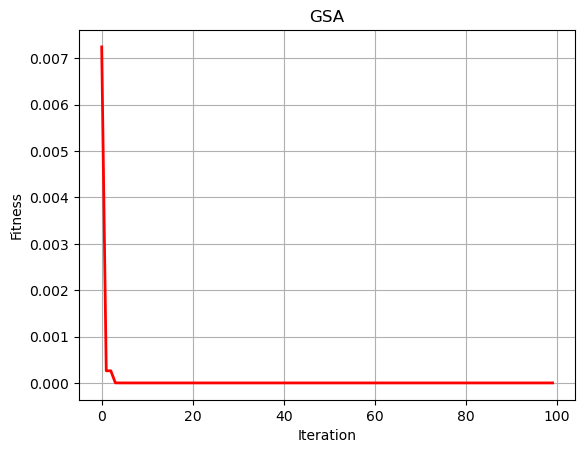

In [29]:
import numpy as np
from matplotlib import pyplot as plt
import GSA

'''适应度函数'''
def fun(X):
        O=X[0]**2 + X[1]**2
        return O

'''黄金正弦算法求解x1^2 + x2^2的最小值'''
'''主函数 '''
#设置参数
pop = 50 #种群数量
MaxIter = 100 #最大迭代次数
dim = 2 #维度
lb = -10*np.ones(dim) #下边界
ub = 10*np.ones(dim)#上边界
#适应度函数选择
fobj = fun
GbestScore,GbestPositon,Curve = GSA.GSA(pop,dim,lb,ub,MaxIter,fobj) 
print('最优适应度值：',GbestScore)
print('最优解[x1,x2]：',GbestPositon)

#绘制适应度曲线
plt.figure(1)
plt.plot(Curve,'r-',linewidth=2)
plt.xlabel('Iteration',fontsize='medium')
plt.ylabel("Fitness",fontsize='medium')
plt.grid()
plt.title('GSA',fontsize='large')
plt.show()

## 教与学优化算法

教与学优化算法（TLBO）基本思想源于教师的工作对学生的影响，即教师的教学水平会影响学生的学习成绩。TLBO的过程分为两个阶段：

（1）教师阶段：学生向教师学习。

（2）学习阶段：学生之间相互学习。

在TLBO算法中，学生群体对应种群；教师安排给学生的各个任务目标对应优化问题中的决策变量；学生的学习成绩对应优化问题的适应度值；种群中的最优解对应教师。

### 应用案例

同黏菌算法。

第0次迭代
第1次迭代
第2次迭代
第3次迭代
第4次迭代
第5次迭代
第6次迭代
第7次迭代
第8次迭代
第9次迭代
第10次迭代
第11次迭代
第12次迭代
第13次迭代
第14次迭代
第15次迭代
第16次迭代
第17次迭代
第18次迭代
第19次迭代
第20次迭代
第21次迭代
第22次迭代
第23次迭代
第24次迭代
第25次迭代
第26次迭代
第27次迭代
第28次迭代
第29次迭代
第30次迭代
第31次迭代
第32次迭代
第33次迭代
第34次迭代
第35次迭代
第36次迭代
第37次迭代
第38次迭代
第39次迭代
第40次迭代
第41次迭代
第42次迭代
第43次迭代
第44次迭代
第45次迭代
第46次迭代
第47次迭代
第48次迭代
第49次迭代
第50次迭代
第51次迭代
第52次迭代
第53次迭代
第54次迭代
第55次迭代
第56次迭代
第57次迭代
第58次迭代
第59次迭代
第60次迭代
第61次迭代
第62次迭代
第63次迭代
第64次迭代
第65次迭代
第66次迭代
第67次迭代
第68次迭代
第69次迭代
第70次迭代
第71次迭代
第72次迭代
第73次迭代
第74次迭代
第75次迭代
第76次迭代
第77次迭代
第78次迭代
第79次迭代
第80次迭代
第81次迭代
第82次迭代
第83次迭代
第84次迭代
第85次迭代
第86次迭代
第87次迭代
第88次迭代
第89次迭代
第90次迭代
第91次迭代
第92次迭代
第93次迭代
第94次迭代
第95次迭代
第96次迭代
第97次迭代
第98次迭代
第99次迭代
最优适应度值： [5.66304741e-09]
最优解[x1,x2]： [[1.00978409e-05 7.45726560e-05]]


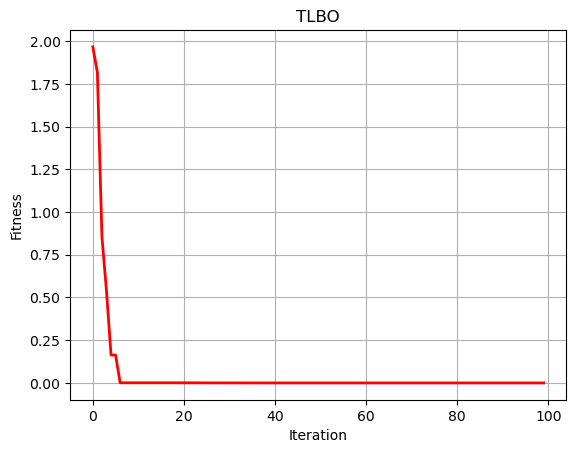

In [30]:
import numpy as np
from matplotlib import pyplot as plt
import TLBO

'''适应度函数'''
def fun(X):
        O=X[0]**2 + X[1]**2
        return O

'''教与学优化算法求解x1^2 + x2^2的最小值'''
'''主函数 '''
#设置参数
pop = 50 #种群数量
MaxIter = 100 #最大迭代次数
dim = 2 #维度
lb = -10*np.ones(dim) #下边界
ub = 10*np.ones(dim)#上边界
#适应度函数选择
fobj = fun
GbestScore,GbestPositon,Curve = TLBO.TLBO(pop,dim,lb,ub,MaxIter,fobj) 
print('最优适应度值：',GbestScore)
print('最优解[x1,x2]：',GbestPositon)

#绘制适应度曲线
plt.figure(1)
plt.plot(Curve,'r-',linewidth=2)
plt.xlabel('Iteration',fontsize='medium')
plt.ylabel("Fitness",fontsize='medium')
plt.grid()
plt.title('TLBO',fontsize='large')
plt.show()